# DSC425 FINAL PROJECT - PREDICTING TEMPERATURE FOR A CITY

## MONTHLY AVERAGE TEMPERATURE FOR Baku, Azerbaijan

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
#Load as a time series
cities = pd.read_csv('GlobalLandTemperaturesByCity.csv', header=0, index_col=0, parse_dates=True,squeeze=True)
#state = pd.read_csv('GlobalLandTemperaturesByState.csv', header=0, index_col=0, parse_dates=True,squeeze=True)
#c = pd.read_csv('GlobalLandTemperaturesByCountry.csv', header=0, index_col=0, parse_dates=True,squeeze=True)
#major = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv', header=0, index_col=0, parse_dates=True,squeeze=True)

In [5]:
cities.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1833-01-01,-2.204,2.693,Baglan,Afghanistan,36.17N,69.61E
1833-02-01,-1.171,2.533,Baglan,Afghanistan,36.17N,69.61E
1833-03-01,3.459,2.799,Baglan,Afghanistan,36.17N,69.61E
1833-04-01,9.917,2.215,Baglan,Afghanistan,36.17N,69.61E
1833-05-01,15.652,2.305,Baglan,Afghanistan,36.17N,69.61E


cities['City'].unique()
len(state['State'].unique())
len(c['Country'].unique())
len(major['City'].unique())
len(cities['City'].unique())


In [8]:
df = cities[cities['City'] == 'Baku']  ###############################################################################
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1808-10-01,11.873,2.189,Baku,Azerbaijan,40.99N,48.99E
1808-11-01,5.537,2.523,Baku,Azerbaijan,40.99N,48.99E
1808-12-01,-0.918,2.543,Baku,Azerbaijan,40.99N,48.99E
1809-01-01,-3.691,3.128,Baku,Azerbaijan,40.99N,48.99E
1809-02-01,-1.182,2.831,Baku,Azerbaijan,40.99N,48.99E


In [9]:
df.tail()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
2013-05-01,17.381,0.509,Baku,Azerbaijan,40.99N,48.99E
2013-06-01,22.012,0.493,Baku,Azerbaijan,40.99N,48.99E
2013-07-01,24.479,0.289,Baku,Azerbaijan,40.99N,48.99E
2013-08-01,23.152,0.331,Baku,Azerbaijan,40.99N,48.99E
2013-09-01,NaN,NaN,Baku,Azerbaijan,40.99N,48.99E


In [10]:
df.isnull().sum()

AverageTemperature               6
AverageTemperatureUncertainty    6
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [11]:
#show location of null values
df[df['AverageTemperature'].isnull()].index.tolist()

[Timestamp('1816-01-01 00:00:00'),
 Timestamp('1816-02-01 00:00:00'),
 Timestamp('1816-03-01 00:00:00'),
 Timestamp('1818-03-01 00:00:00'),
 Timestamp('1819-05-01 00:00:00'),
 Timestamp('2013-09-01 00:00:00')]

In [12]:
#set dataset to Jan 1820-Dec 2012
df = df['1820-01-01' : '2012-12-01']
df.tail()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
2012-08-01,25.620,0.264,Baku,Azerbaijan,40.99N,48.99E
2012-09-01,19.958,0.204,Baku,Azerbaijan,40.99N,48.99E
2012-10-01,16.053,0.629,Baku,Azerbaijan,40.99N,48.99E
2012-11-01,9.531,0.966,Baku,Azerbaijan,40.99N,48.99E
2012-12-01,3.159,1.427,Baku,Azerbaijan,40.99N,48.99E


In [13]:
#only use 'AverageTemperature' column
df = df[['AverageTemperature']]
df.head()

,AverageTemperature
dt,
1820-01-01,-1.066
1820-02-01,-1.464
1820-03-01,3.623
1820-04-01,9.818
1820-05-01,15.491


### 192 years

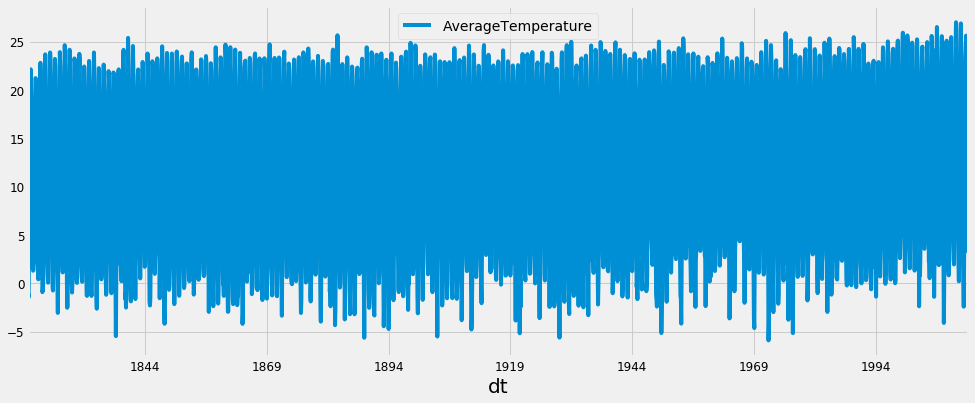

In [25]:
#all data points (192 years of monthly average temperatures = 2,304 points)
df.plot(figsize=(15, 6))
plt.show()

In [26]:
df.AverageTemperature.mean()

11.161546200345441

### First 100 years

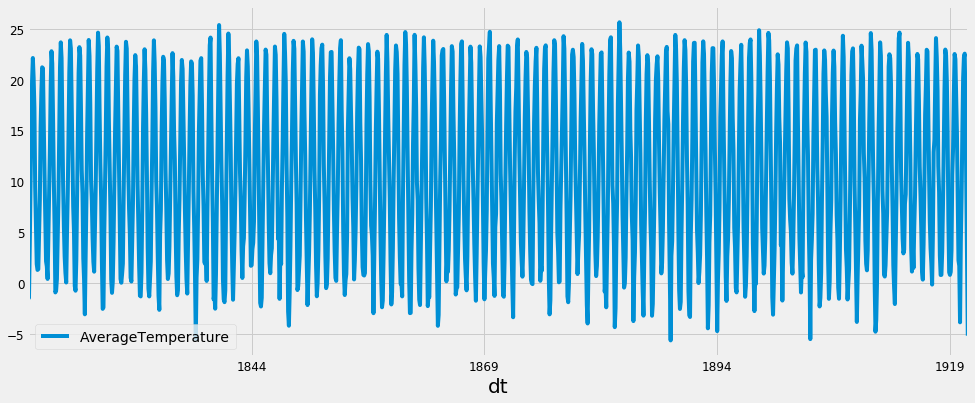

In [27]:
#first 100 years
df1 = df['1820-01-01' : '1920-12-01']
df1.plot(figsize=(15, 6))
plt.show()

In [28]:
df1.AverageTemperature.mean()

10.784671617161713

Summary statistics for first 100 years

In [30]:
df1.describe()

,AverageTemperature
count,1212.000000
mean,10.784672
std,8.571164
min,-5.638000
25%,2.944500
50%,9.919500
75%,18.984500
max,25.655000


### Most recent 92 years

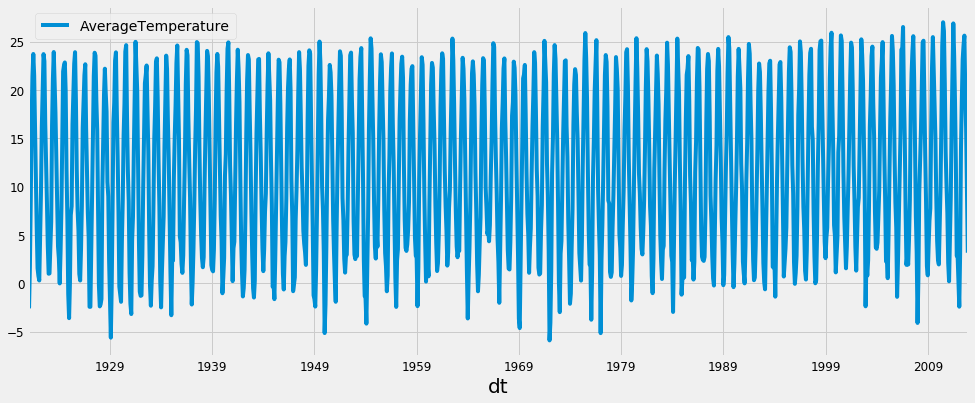

In [31]:

df2 = df['1921-01-01': '2012-12-01']
df2.plot(figsize=(15, 6))
plt.show()

In [32]:
df2.AverageTemperature.mean()

11.575288949275368

In [33]:
df2.describe()

,AverageTemperature
count,1104.000000
mean,11.575289
std,8.545927
min,-5.911000
25%,3.623750
50%,11.309500
75%,19.556750
max,27.000000


### First 50 years : 1820-1870

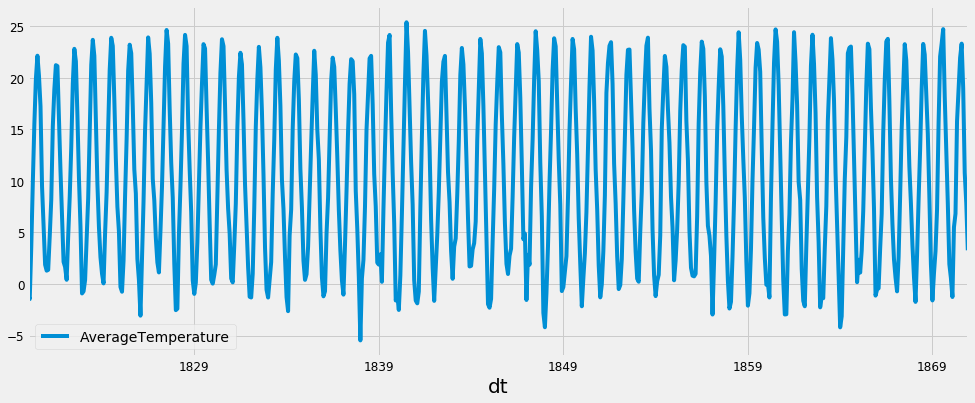

In [35]:
#1st 50 years
df3 = df['1820-01-01' : '1870-12-01']
df3.plot(figsize=(15, 6))
plt.show()

In [36]:
df3.AverageTemperature.mean()

10.661464052287576

In [37]:
df3.describe()

,AverageTemperature
count,612.000000
mean,10.661464
std,8.512554
min,-5.471000
25%,2.691500
50%,9.774500
75%,18.806250
max,25.383000


### Most recent 50 years : 1962-2012

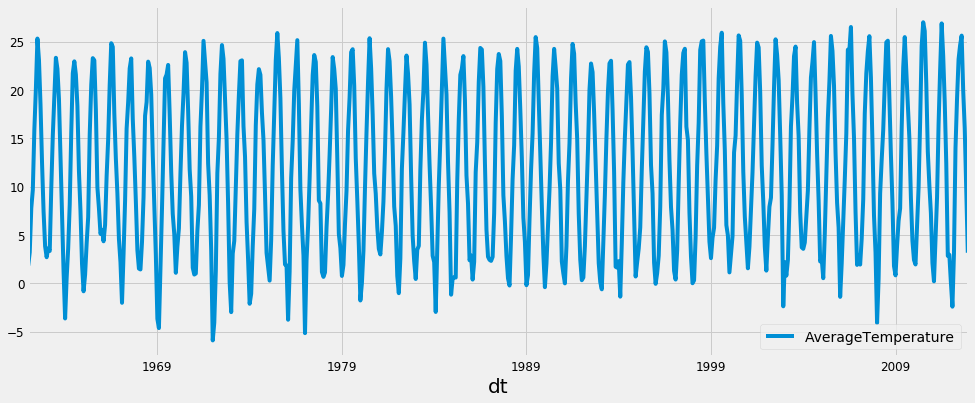

In [38]:
#last 50 years
df4 = df['1962-01-01': '2012-12-01']
df4.plot(figsize=(15, 6))
plt.show()

In [20]:
df4.AverageTemperature.mean()

11.910254901960792

In [39]:
df4.describe()

,AverageTemperature
count,612.000000
mean,11.910255
std,8.485357
min,-5.911000
25%,3.826500
50%,11.518500
75%,19.777750
max,27.000000


### Most recent 12 years : 2000-2012

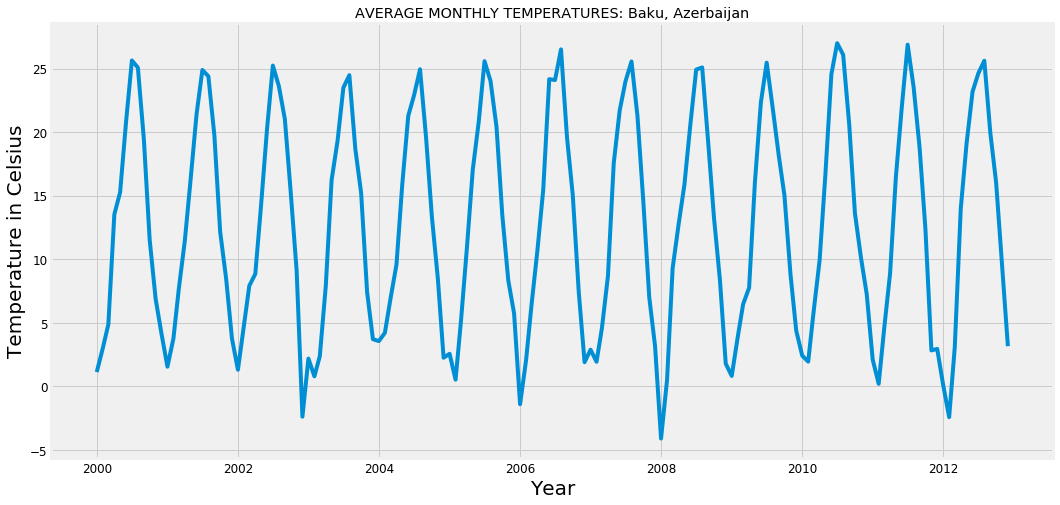

In [14]:
#last 12 years
df5 = df['2000-01-01': '2012-12-01']
plt.figure(figsize=(16,8))
#df5.plot(figsize=(15, 6))
plt.plot(df5)
plt.title("AVERAGE MONTHLY TEMPERATURES: Baku, Azerbaijan")
plt.ylabel("Temperature in Celsius")
plt.xlabel('Year')
plt.show()




In [15]:
df5.AverageTemperature.mean()

12.647442307692312

In [16]:
df5.describe()

,AverageTemperature
count,156.000000
mean,12.647442
std,8.625335
min,-4.105000
25%,4.454250
50%,12.568000
75%,20.646750
max,27.000000


### DECOMPOSITION LAST 12 YEARS

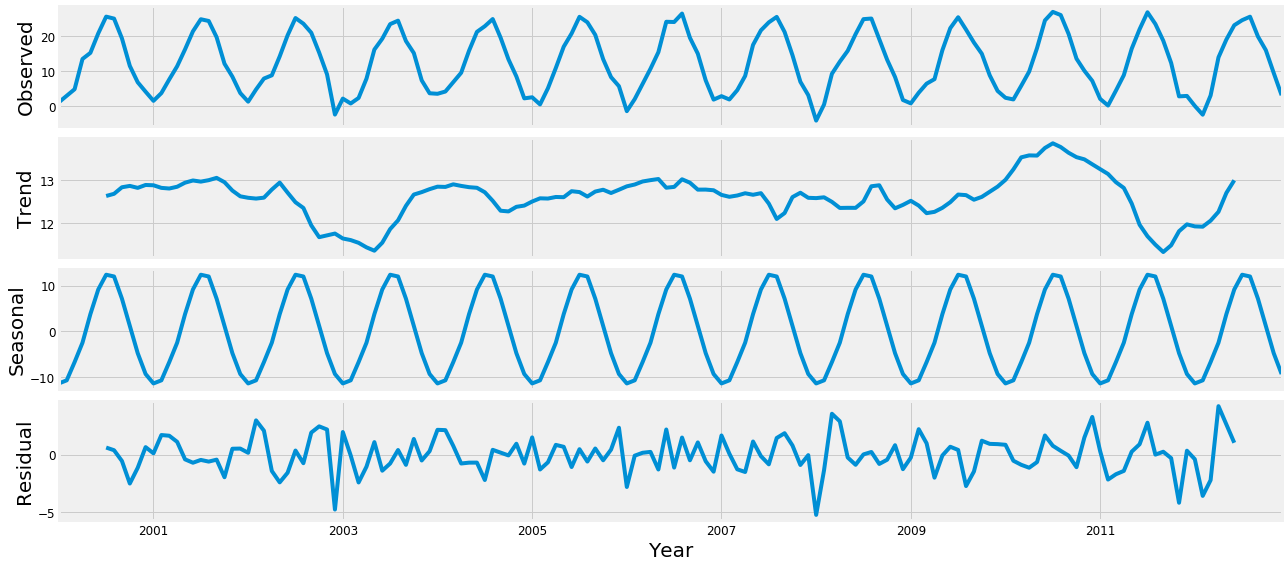

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df5, model='additive')
fig = decomposition.plot()
plt.xlabel('Year')
plt.show()



### ACF & PCF

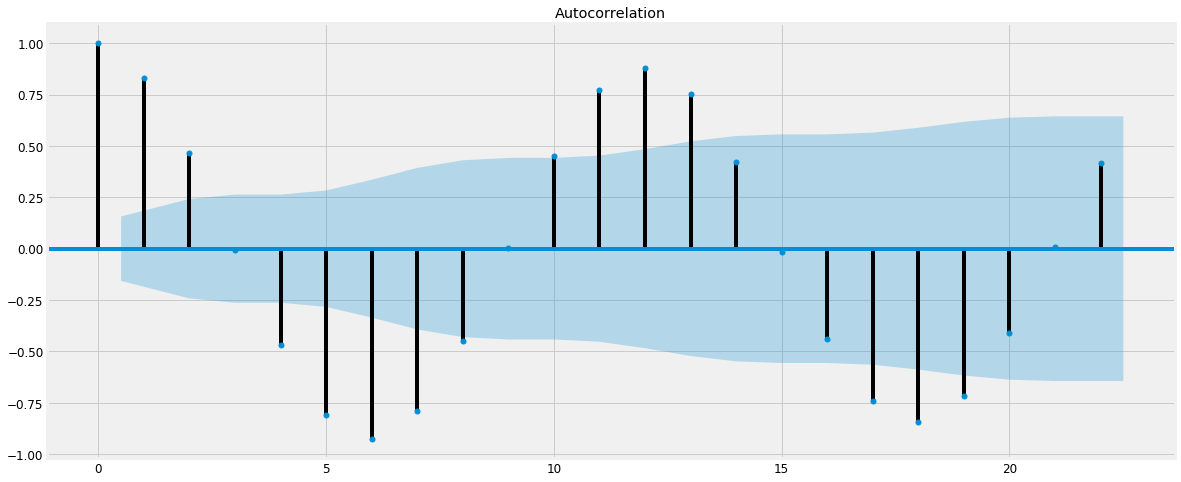

In [18]:
plot_acf(df5)
plt.show()

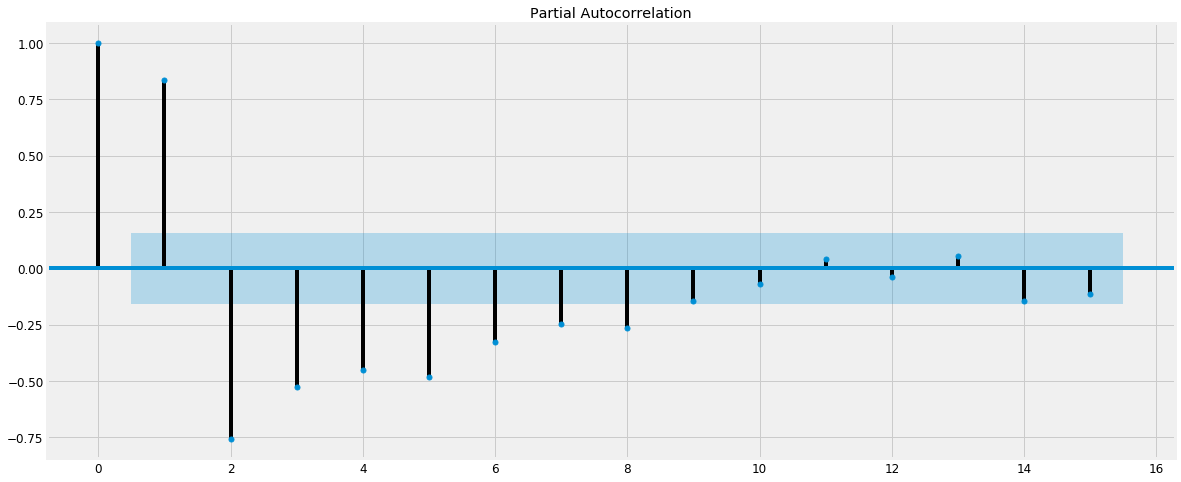

In [38]:
plot_pacf(df5, lags=15)
plt.show()

### DIFFERENCING

In [48]:
#sm.tsa.statespace.tools.diff(series, k_diff=1, k_seasonal_diff=None, seasonal_periods=1)
diff1 = sm.tsa.statespace.tools.diff(df5, k_diff=0, k_seasonal_diff=4, seasonal_periods=12)

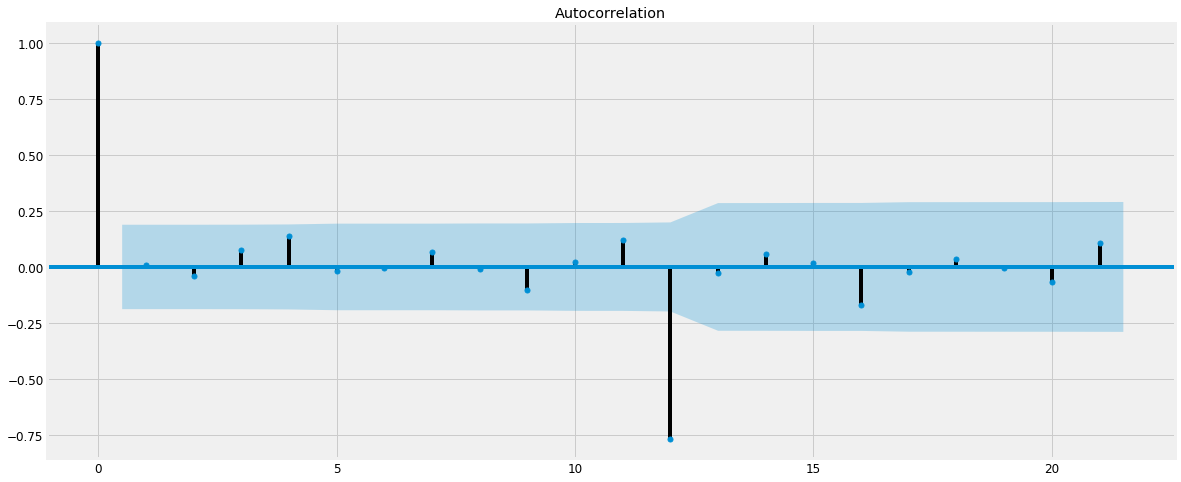

In [49]:
plot_acf(diff1)
plt.show()

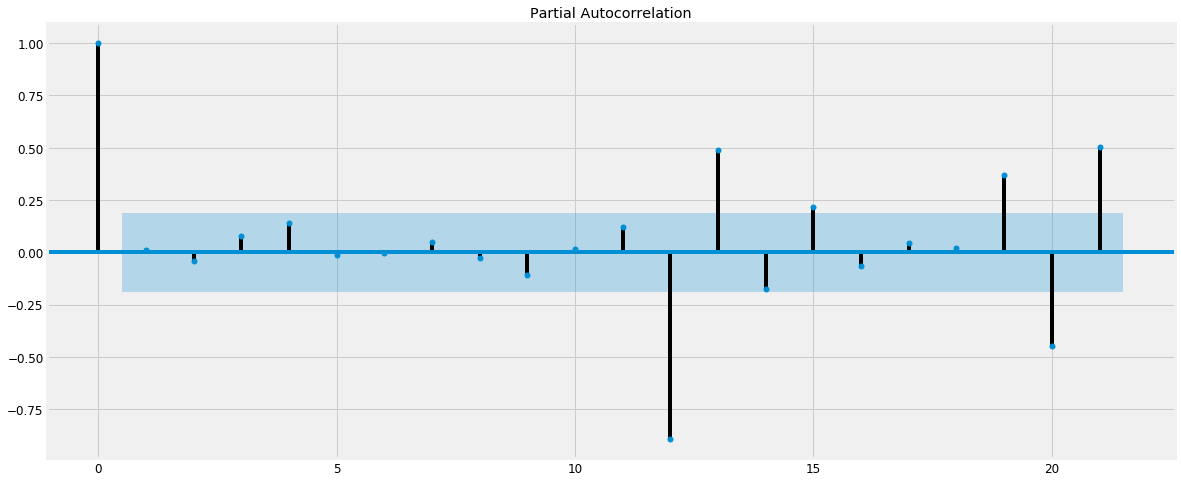

In [50]:
plot_pacf(diff1)
plt.show()

### SPLIT TRAIN/TEST (11 years and 1 year most recent)  


In [23]:
# CHANGE AS NEEDED #################################################################################################
train = df['2000-01-01': '2011-12-01']
test = df['2012-01-01': '2012-12-01']

# SARIMA

## FIRST RUN ITERATING THROUGH POSSIBILITIES WITH 0,1

In [33]:
#parameters account for seasonality, trend, and noise
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [34]:
#parameter Selection for the ARIMA Model -goal here is to use a “grid search” type process to find the 
#optimal set of parameters that yields the best performance for our model.

train.index = pd.DatetimeIndex(train.index.values, freq=train.index.inferred_freq) #clears error about frequency

resultsListA = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tempList = []
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            tempList.append(param)
            tempList.append(param_seasonal)
            tempList.append(results.aic)
            resultsListA.append(tempList)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1187.4530055944529
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:961.2536265169219
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:598.0974901957563
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:487.0463268959866
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:602.6920495343103
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:534.1514179771539
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:514.1054126705685
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:486.4806738895188
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1018.4000245078889
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:863.0934846380053
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:594.5934448934208
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:481.6662272297586
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:602.6447215904616
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:529.5892948807127
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:509.3191008205266
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:478.9980426900135
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:853.3423346272799
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:737.6921762965057
ARIMA(0,

In [51]:
#what is min AIC?
min(x[2] for x in resultsListA)

478.9980426900135

## SECOND RUN OF ITERATING THROUGH POSSIBLE COMBINATIONS: 0.1.2.3.4

In [91]:
#parameters account for seasonality, trend, and noise
p = d = q = range(0, 5)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 0, 3, 12)
SARIMAX: (0, 0, 2) x (0, 0, 4, 12)


In [ ]:
#parameter Selection for the ARIMA Model -goal here is to use a “grid search” type process to find the 
#optimal set of parameters that yields the best performance for our model.

train.index = pd.DatetimeIndex(train.index.values, freq=train.index.inferred_freq) #clears error about frequency

resultsList = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tempList = []
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            tempList.append(param)
            tempList.append(param_seasonal)
            tempList.append(results.aic)
            resultsList.append(tempList)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1187.4530055944529
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:961.2536265169219
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:796.7269162263389
ARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:4849.2298179675645
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:598.0974901957563
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:487.0463268959866
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:434.5059787534485
ARIMA(0, 0, 0)x(0, 1, 3, 12)12 - AIC:4143.113351034195
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:679.723591381748
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:527.0790899286427
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:418.2435434462901
ARIMA(0, 0, 0)x(0, 2, 3, 12)12 - AIC:3554.357364587496
ARIMA(0, 0, 0)x(0, 3, 0, 12)12 - AIC:727.2418713489121
ARIMA(0, 0, 0)x(0, 3, 1, 12)12 - AIC:581.395026816816
ARIMA(0, 0, 0)x(0, 3, 2, 12)12 - AIC:485.9931655717989
ARIMA(0, 0, 0)x(0, 4, 0, 12)12 - AIC:668.7897281656877
ARIMA(0, 0, 0)x(0, 4, 1, 12)12 - AIC:556.7557499244532
ARIMA(0, 0, 0)x(0, 4, 2, 12)12 - AIC:2727.2224487719554
ARIMA(0, 

ARIMA(0, 0, 1)x(3, 1, 1, 12)12 - AIC:379.7136432047354
ARIMA(0, 0, 1)x(3, 1, 2, 12)12 - AIC:381.02301477041425
ARIMA(0, 0, 1)x(3, 1, 3, 12)12 - AIC:3902.40464769688
ARIMA(0, 0, 1)x(3, 2, 0, 12)12 - AIC:384.50742167263394
ARIMA(0, 0, 1)x(3, 2, 1, 12)12 - AIC:366.1853020444897
ARIMA(0, 0, 1)x(3, 2, 2, 12)12 - AIC:368.12129151997044
ARIMA(0, 0, 1)x(3, 2, 3, 12)12 - AIC:5928.200647919745
ARIMA(0, 0, 1)x(3, 3, 0, 12)12 - AIC:367.29802117289796
ARIMA(0, 0, 1)x(3, 3, 1, 12)12 - AIC:364.1285018627598
ARIMA(0, 0, 1)x(3, 3, 2, 12)12 - AIC:363.7655761303887
ARIMA(0, 0, 1)x(3, 4, 0, 12)12 - AIC:352.0474609385074
ARIMA(0, 0, 1)x(3, 4, 1, 12)12 - AIC:351.42986576962886
ARIMA(0, 0, 1)x(3, 4, 2, 12)12 - AIC:2161.1393247859996
ARIMA(0, 0, 1)x(4, 0, 0, 12)12 - AIC:390.4869643035463
ARIMA(0, 0, 1)x(4, 0, 1, 12)12 - AIC:390.57541350070494
ARIMA(0, 0, 1)x(4, 0, 2, 12)12 - AIC:381.8482242382081
ARIMA(0, 0, 1)x(4, 0, 3, 12)12 - AIC:6386.941415403106
ARIMA(0, 0, 1)x(4, 1, 0, 12)12 - AIC:340.1091518121631
ARIM

ARIMA(0, 0, 3)x(1, 2, 3, 12)12 - AIC:3215.3124977104853
ARIMA(0, 0, 3)x(1, 3, 0, 12)12 - AIC:526.0838793646086
ARIMA(0, 0, 3)x(1, 3, 1, 12)12 - AIC:485.8435709293435
ARIMA(0, 0, 3)x(1, 3, 2, 12)12 - AIC:411.14202491173563
ARIMA(0, 0, 3)x(1, 4, 0, 12)12 - AIC:514.9796572063251
ARIMA(0, 0, 3)x(1, 4, 1, 12)12 - AIC:485.3046222555926
ARIMA(0, 0, 3)x(1, 4, 2, 12)12 - AIC:2327.3175931053247
ARIMA(0, 0, 3)x(2, 0, 0, 12)12 - AIC:513.9629093929126
ARIMA(0, 0, 3)x(2, 0, 1, 12)12 - AIC:519.5902495205958
ARIMA(0, 0, 3)x(2, 0, 2, 12)12 - AIC:476.8359511569748
ARIMA(0, 0, 3)x(2, 0, 3, 12)12 - AIC:6843.4133204101745
ARIMA(0, 0, 3)x(2, 1, 0, 12)12 - AIC:443.33438575653906
ARIMA(0, 0, 3)x(2, 1, 1, 12)12 - AIC:441.4020559656284
ARIMA(0, 0, 3)x(2, 1, 2, 12)12 - AIC:416.8165721332327
ARIMA(0, 0, 3)x(2, 1, 3, 12)12 - AIC:4189.913577045152
ARIMA(0, 0, 3)x(2, 2, 0, 12)12 - AIC:452.401624481657
ARIMA(0, 0, 3)x(2, 2, 1, 12)12 - AIC:429.36758822617037
ARIMA(0, 0, 3)x(2, 2, 2, 12)12 - AIC:410.84291520373097
ARIM

ARIMA(0, 0, 4)x(4, 4, 1, 12)12 - AIC:278.3181643168936
ARIMA(0, 0, 4)x(4, 4, 2, 12)12 - AIC:1421.6920178019466
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:853.3423346272799
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:737.6921762965057
ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:634.9718108174571
ARIMA(0, 1, 0)x(0, 0, 3, 12)12 - AIC:4296.271636016199
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:667.4941078086395
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:544.7937737777409
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:477.05324301813624
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:4017.426189259657
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:749.3461108510277
ARIMA(0, 1, 0)x(0, 2, 1, 12)12 - AIC:580.3523451690119
ARIMA(0, 1, 0)x(0, 2, 2, 12)12 - AIC:459.9902938217845
ARIMA(0, 1, 0)x(0, 2, 3, 12)12 - AIC:3561.618482101512
ARIMA(0, 1, 0)x(0, 3, 0, 12)12 - AIC:804.4957048193388
ARIMA(0, 1, 0)x(0, 3, 1, 12)12 - AIC:642.8439204218819
ARIMA(0, 1, 0)x(0, 3, 2, 12)12 - AIC:526.8291509087993
ARIMA(0, 1, 0)x(0, 4, 0, 12)12 - AIC:726.171634201002
ARIMA(0, 

ARIMA(0, 1, 1)x(3, 0, 3, 12)12 - AIC:3671.1283128427103
ARIMA(0, 1, 1)x(3, 1, 0, 12)12 - AIC:388.8932407942643
ARIMA(0, 1, 1)x(3, 1, 1, 12)12 - AIC:387.7222669773539
ARIMA(0, 1, 1)x(3, 1, 2, 12)12 - AIC:388.5152503230664
ARIMA(0, 1, 1)x(3, 1, 3, 12)12 - AIC:6009.909140111027
ARIMA(0, 1, 1)x(3, 2, 0, 12)12 - AIC:392.7795493708048
ARIMA(0, 1, 1)x(3, 2, 1, 12)12 - AIC:374.9800102854174
ARIMA(0, 1, 1)x(3, 2, 2, 12)12 - AIC:376.9328331177079
ARIMA(0, 1, 1)x(3, 2, 3, 12)12 - AIC:3798.9663681954326
ARIMA(0, 1, 1)x(3, 3, 0, 12)12 - AIC:374.9039879161164
ARIMA(0, 1, 1)x(3, 3, 1, 12)12 - AIC:374.22088528398604
ARIMA(0, 1, 1)x(3, 3, 2, 12)12 - AIC:376.7575860642769
ARIMA(0, 1, 1)x(3, 4, 0, 12)12 - AIC:374.63167132347803
ARIMA(0, 1, 1)x(3, 4, 1, 12)12 - AIC:355.92071944154054
ARIMA(0, 1, 1)x(3, 4, 2, 12)12 - AIC:3730.467659694106
ARIMA(0, 1, 1)x(4, 0, 0, 12)12 - AIC:390.7012858412844
ARIMA(0, 1, 1)x(4, 0, 1, 12)12 - AIC:388.51942895508313
ARIMA(0, 1, 1)x(4, 0, 2, 12)12 - AIC:389.313285968163
ARIMA

ARIMA(0, 1, 3)x(1, 2, 0, 12)12 - AIC:543.2509504275376
ARIMA(0, 1, 3)x(1, 2, 1, 12)12 - AIC:480.05248497412407
ARIMA(0, 1, 3)x(1, 2, 2, 12)12 - AIC:409.995619619059
ARIMA(0, 1, 3)x(1, 2, 3, 12)12 - AIC:3399.038755434571
ARIMA(0, 1, 3)x(1, 3, 0, 12)12 - AIC:527.7310722701276
ARIMA(0, 1, 3)x(1, 3, 1, 12)12 - AIC:487.49904671125387
ARIMA(0, 1, 3)x(1, 3, 2, 12)12 - AIC:418.8203231098257
ARIMA(0, 1, 3)x(1, 4, 0, 12)12 - AIC:516.8946745181354
ARIMA(0, 1, 3)x(1, 4, 1, 12)12 - AIC:485.4225493094196
ARIMA(0, 1, 3)x(1, 4, 2, 12)12 - AIC:2560.1339259182205
ARIMA(0, 1, 3)x(2, 0, 0, 12)12 - AIC:515.7892847878982
ARIMA(0, 1, 3)x(2, 0, 1, 12)12 - AIC:494.4210522074682
ARIMA(0, 1, 3)x(2, 0, 2, 12)12 - AIC:479.72815946795697
ARIMA(0, 1, 3)x(2, 0, 3, 12)12 - AIC:3825.842384448236
ARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:445.8838749651364
ARIMA(0, 1, 3)x(2, 1, 1, 12)12 - AIC:445.6977242666029
ARIMA(0, 1, 3)x(2, 1, 2, 12)12 - AIC:423.16993922015274
ARIMA(0, 1, 3)x(2, 1, 3, 12)12 - AIC:nan
ARIMA(0, 1, 3)x(2, 2

ARIMA(0, 1, 4)x(4, 4, 0, 12)12 - AIC:274.4519864883721
ARIMA(0, 1, 4)x(4, 4, 1, 12)12 - AIC:276.342132206052
ARIMA(0, 1, 4)x(4, 4, 2, 12)12 - AIC:nan
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:803.6966830505819
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:735.6091407278461
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:653.0499959955897
ARIMA(0, 2, 0)x(0, 0, 3, 12)12 - AIC:3836.0548297528458
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:798.4811131644665
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:657.2373783220299
ARIMA(0, 2, 0)x(0, 1, 2, 12)12 - AIC:572.3297526314191
ARIMA(0, 2, 0)x(0, 1, 3, 12)12 - AIC:5393.0592299253085
ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:869.0392190344966
ARIMA(0, 2, 0)x(0, 2, 1, 12)12 - AIC:686.1708222450834
ARIMA(0, 2, 0)x(0, 2, 2, 12)12 - AIC:548.2109235349935
ARIMA(0, 2, 0)x(0, 2, 3, 12)12 - AIC:3386.439700628723
ARIMA(0, 2, 0)x(0, 3, 0, 12)12 - AIC:914.4385314998465
ARIMA(0, 2, 0)x(0, 3, 1, 12)12 - AIC:737.1930448517888
ARIMA(0, 2, 0)x(0, 3, 2, 12)12 - AIC:649.537747181563
ARIMA(0, 2, 0)x(0, 4, 0,

ARIMA(0, 2, 1)x(3, 1, 1, 12)12 - AIC:426.91001318215234
ARIMA(0, 2, 1)x(3, 1, 2, 12)12 - AIC:428.83423565556234
ARIMA(0, 2, 1)x(3, 1, 3, 12)12 - AIC:5878.485084236954
ARIMA(0, 2, 1)x(3, 2, 0, 12)12 - AIC:420.3356436392125
ARIMA(0, 2, 1)x(3, 2, 1, 12)12 - AIC:405.66240321960066
ARIMA(0, 2, 1)x(3, 2, 2, 12)12 - AIC:405.796687426356
ARIMA(0, 2, 1)x(3, 2, 3, 12)12 - AIC:5607.921419521742
ARIMA(0, 2, 1)x(3, 3, 0, 12)12 - AIC:396.07659846232497
ARIMA(0, 2, 1)x(3, 3, 1, 12)12 - AIC:394.5434277182436
ARIMA(0, 2, 1)x(3, 3, 2, 12)12 - AIC:393.9117083168005
ARIMA(0, 2, 1)x(3, 4, 0, 12)12 - AIC:364.4360827896965
ARIMA(0, 2, 1)x(3, 4, 1, 12)12 - AIC:597.5987214287716
ARIMA(0, 2, 1)x(3, 4, 2, 12)12 - AIC:3640.315982523283
ARIMA(0, 2, 1)x(4, 0, 0, 12)12 - AIC:429.01348679412365
ARIMA(0, 2, 1)x(4, 0, 1, 12)12 - AIC:428.88153874655507
ARIMA(0, 2, 1)x(4, 0, 2, 12)12 - AIC:430.8071496614791
ARIMA(0, 2, 1)x(4, 0, 3, 12)12 - AIC:nan
ARIMA(0, 2, 1)x(4, 1, 0, 12)12 - AIC:380.7195501945156
ARIMA(0, 2, 1)x(4, 

ARIMA(0, 2, 3)x(1, 3, 1, 12)12 - AIC:508.0588518222869
ARIMA(0, 2, 3)x(1, 3, 2, 12)12 - AIC:415.13758440750456
ARIMA(0, 2, 3)x(1, 4, 0, 12)12 - AIC:512.6358454291328
ARIMA(0, 2, 3)x(1, 4, 1, 12)12 - AIC:484.5243004532805
ARIMA(0, 2, 3)x(1, 4, 2, 12)12 - AIC:nan
ARIMA(0, 2, 3)x(2, 0, 0, 12)12 - AIC:523.9268159816102
ARIMA(0, 2, 3)x(2, 0, 1, 12)12 - AIC:504.0985569898928
ARIMA(0, 2, 3)x(2, 0, 2, 12)12 - AIC:486.43450121030986
ARIMA(0, 2, 3)x(2, 0, 3, 12)12 - AIC:nan
ARIMA(0, 2, 3)x(2, 1, 0, 12)12 - AIC:453.62453621502436
ARIMA(0, 2, 3)x(2, 1, 1, 12)12 - AIC:440.17436714767655
ARIMA(0, 2, 3)x(2, 1, 2, 12)12 - AIC:428.4340663440181
ARIMA(0, 2, 3)x(2, 1, 3, 12)12 - AIC:nan
ARIMA(0, 2, 3)x(2, 2, 0, 12)12 - AIC:457.8614345891059
ARIMA(0, 2, 3)x(2, 2, 1, 12)12 - AIC:436.17277219676015
ARIMA(0, 2, 3)x(2, 2, 2, 12)12 - AIC:420.21562792143186
ARIMA(0, 2, 3)x(2, 2, 3, 12)12 - AIC:2803.9967141176376
ARIMA(0, 2, 3)x(2, 3, 0, 12)12 - AIC:439.8494096334194
ARIMA(0, 2, 3)x(2, 3, 1, 12)12 - AIC:434.6183

ARIMA(0, 3, 0)x(0, 0, 3, 12)12 - AIC:3463.103690876705
ARIMA(0, 3, 0)x(0, 1, 0, 12)12 - AIC:940.2264756797506
ARIMA(0, 3, 0)x(0, 1, 1, 12)12 - AIC:782.1699619121027
ARIMA(0, 3, 0)x(0, 1, 2, 12)12 - AIC:678.7577630763765
ARIMA(0, 3, 0)x(0, 1, 3, 12)12 - AIC:3680.650566883266
ARIMA(0, 3, 0)x(0, 2, 0, 12)12 - AIC:998.4209553805928
ARIMA(0, 3, 0)x(0, 2, 1, 12)12 - AIC:800.1331070523794
ARIMA(0, 3, 0)x(0, 2, 2, 12)12 - AIC:646.4591329128353
ARIMA(0, 3, 0)x(0, 2, 3, 12)12 - AIC:2811.9962373683384
ARIMA(0, 3, 0)x(0, 3, 0, 12)12 - AIC:1030.7838932478096
ARIMA(0, 3, 0)x(0, 3, 1, 12)12 - AIC:836.1097390306107
ARIMA(0, 3, 0)x(0, 3, 2, 12)12 - AIC:699.3376368919292
ARIMA(0, 3, 0)x(0, 4, 0, 12)12 - AIC:922.6625633621843
ARIMA(0, 3, 0)x(0, 4, 1, 12)12 - AIC:754.541727182442
ARIMA(0, 3, 0)x(0, 4, 2, 12)12 - AIC:2566.7408784730683
ARIMA(0, 3, 0)x(1, 0, 0, 12)12 - AIC:836.0796426497034
ARIMA(0, 3, 0)x(1, 0, 1, 12)12 - AIC:832.5872017292631
ARIMA(0, 3, 0)x(1, 0, 2, 12)12 - AIC:747.4186208453899
ARIMA(0,

ARIMA(0, 3, 1)x(3, 2, 1, 12)12 - AIC:475.46467172696987
ARIMA(0, 3, 1)x(3, 2, 2, 12)12 - AIC:474.71140182128113
ARIMA(0, 3, 1)x(3, 2, 3, 12)12 - AIC:2468.069100019848
ARIMA(0, 3, 1)x(3, 3, 0, 12)12 - AIC:454.3753568084594
ARIMA(0, 3, 1)x(3, 3, 1, 12)12 - AIC:449.85909187303866
ARIMA(0, 3, 1)x(3, 3, 2, 12)12 - AIC:449.55728100928474
ARIMA(0, 3, 1)x(3, 4, 0, 12)12 - AIC:409.3553867254961
ARIMA(0, 3, 1)x(3, 4, 1, 12)12 - AIC:409.48199275212147
ARIMA(0, 3, 1)x(3, 4, 2, 12)12 - AIC:1677.308137438309
ARIMA(0, 3, 1)x(4, 0, 0, 12)12 - AIC:504.2302578306792
ARIMA(0, 3, 1)x(4, 0, 1, 12)12 - AIC:505.4268832465155
ARIMA(0, 3, 1)x(4, 0, 2, 12)12 - AIC:506.6184830959982
ARIMA(0, 3, 1)x(4, 0, 3, 12)12 - AIC:3085.30135483491
ARIMA(0, 3, 1)x(4, 1, 0, 12)12 - AIC:445.6891217509822
ARIMA(0, 3, 1)x(4, 1, 1, 12)12 - AIC:444.8462122750142
ARIMA(0, 3, 1)x(4, 1, 2, 12)12 - AIC:444.4320851010311
ARIMA(0, 3, 1)x(4, 1, 3, 12)12 - AIC:nan
ARIMA(0, 3, 1)x(4, 2, 0, 12)12 - AIC:395.8916248773084
ARIMA(0, 3, 1)x(4, 2

ARIMA(0, 3, 3)x(1, 4, 0, 12)12 - AIC:619.0539514615529
ARIMA(0, 3, 3)x(1, 4, 1, 12)12 - AIC:488.01270676573137
ARIMA(0, 3, 3)x(1, 4, 2, 12)12 - AIC:4422.833677932797
ARIMA(0, 3, 3)x(2, 0, 0, 12)12 - AIC:541.675262487307
ARIMA(0, 3, 3)x(2, 0, 1, 12)12 - AIC:521.1801762876637
ARIMA(0, 3, 3)x(2, 0, 2, 12)12 - AIC:507.3799437343154
ARIMA(0, 3, 3)x(2, 0, 3, 12)12 - AIC:2955.789317974041
ARIMA(0, 3, 3)x(2, 1, 0, 12)12 - AIC:467.6026074965893
ARIMA(0, 3, 3)x(2, 1, 1, 12)12 - AIC:452.45553038577776
ARIMA(0, 3, 3)x(2, 1, 2, 12)12 - AIC:440.06862907450704
ARIMA(0, 3, 3)x(2, 1, 3, 12)12 - AIC:nan
ARIMA(0, 3, 3)x(2, 2, 0, 12)12 - AIC:468.9325862574797
ARIMA(0, 3, 3)x(2, 2, 1, 12)12 - AIC:445.64695149693307
ARIMA(0, 3, 3)x(2, 2, 2, 12)12 - AIC:427.98003001778466
ARIMA(0, 3, 3)x(2, 2, 3, 12)12 - AIC:5368.716833237408
ARIMA(0, 3, 3)x(2, 3, 0, 12)12 - AIC:449.8127453544907
ARIMA(0, 3, 3)x(2, 3, 1, 12)12 - AIC:449.01740306320664
ARIMA(0, 3, 3)x(2, 3, 2, 12)12 - AIC:430.19542818458933
ARIMA(0, 3, 3)x(2,

ARIMA(0, 4, 0)x(0, 0, 3, 12)12 - AIC:2890.410904807151
ARIMA(0, 4, 0)x(0, 1, 0, 12)12 - AIC:1086.359711949326
ARIMA(0, 4, 0)x(0, 1, 1, 12)12 - AIC:912.2841542996598
ARIMA(0, 4, 0)x(0, 1, 2, 12)12 - AIC:792.572791872612
ARIMA(0, 4, 0)x(0, 1, 3, 12)12 - AIC:2923.044364048249
ARIMA(0, 4, 0)x(0, 2, 0, 12)12 - AIC:1131.3369831860307
ARIMA(0, 4, 0)x(0, 2, 1, 12)12 - AIC:917.6021413460852
ARIMA(0, 4, 0)x(0, 2, 2, 12)12 - AIC:749.2463514246168
ARIMA(0, 4, 0)x(0, 2, 3, 12)12 - AIC:2524.1163819235358
ARIMA(0, 4, 0)x(0, 3, 0, 12)12 - AIC:1149.3917394987748
ARIMA(0, 4, 0)x(0, 3, 1, 12)12 - AIC:937.5196301261055
ARIMA(0, 4, 0)x(0, 3, 2, 12)12 - AIC:786.9933496243759
ARIMA(0, 4, 0)x(0, 4, 0, 12)12 - AIC:1025.0103855980324
ARIMA(0, 4, 0)x(0, 4, 1, 12)12 - AIC:835.2551513771107
ARIMA(0, 4, 0)x(0, 4, 2, 12)12 - AIC:2419.0030987883447
ARIMA(0, 4, 0)x(1, 0, 0, 12)12 - AIC:975.3638510946101
ARIMA(0, 4, 0)x(1, 0, 1, 12)12 - AIC:970.5667081852645
ARIMA(0, 4, 0)x(1, 0, 2, 12)12 - AIC:872.3221274690443
ARIMA(

ARIMA(0, 4, 1)x(3, 2, 1, 12)12 - AIC:556.1935479674906
ARIMA(0, 4, 1)x(3, 2, 2, 12)12 - AIC:562.9138831648858
ARIMA(0, 4, 1)x(3, 2, 3, 12)12 - AIC:2044.101005192603
ARIMA(0, 4, 1)x(3, 3, 0, 12)12 - AIC:520.4625541630435
ARIMA(0, 4, 1)x(3, 3, 1, 12)12 - AIC:511.91839042033195
ARIMA(0, 4, 1)x(3, 3, 2, 12)12 - AIC:512.0034216580384
ARIMA(0, 4, 1)x(3, 4, 0, 12)12 - AIC:460.70500501302524
ARIMA(0, 4, 1)x(3, 4, 1, 12)12 - AIC:460.58422259650644
ARIMA(0, 4, 1)x(3, 4, 2, 12)12 - AIC:1884.5245875108133
ARIMA(0, 4, 1)x(4, 0, 0, 12)12 - AIC:582.0967559801477
ARIMA(0, 4, 1)x(4, 0, 1, 12)12 - AIC:583.404695310659
ARIMA(0, 4, 1)x(4, 0, 2, 12)12 - AIC:580.221161643655
ARIMA(0, 4, 1)x(4, 0, 3, 12)12 - AIC:nan
ARIMA(0, 4, 1)x(4, 1, 0, 12)12 - AIC:524.8048723674826
ARIMA(0, 4, 1)x(4, 1, 1, 12)12 - AIC:524.288871248819
ARIMA(0, 4, 1)x(4, 1, 2, 12)12 - AIC:521.4525221300106
ARIMA(0, 4, 1)x(4, 1, 3, 12)12 - AIC:nan
ARIMA(0, 4, 1)x(4, 2, 0, 12)12 - AIC:458.4443319899323
ARIMA(0, 4, 1)x(4, 2, 1, 12)12 - AIC:

ARIMA(0, 4, 3)x(1, 4, 2, 12)12 - AIC:4217.899860644553
ARIMA(0, 4, 3)x(2, 0, 0, 12)12 - AIC:590.0987708064948
ARIMA(0, 4, 3)x(2, 0, 1, 12)12 - AIC:590.9175425017472
ARIMA(0, 4, 3)x(2, 0, 2, 12)12 - AIC:550.2122953407877
ARIMA(0, 4, 3)x(2, 0, 3, 12)12 - AIC:2804.0171540879833
ARIMA(0, 4, 3)x(2, 1, 0, 12)12 - AIC:497.3993817695064
ARIMA(0, 4, 3)x(2, 1, 1, 12)12 - AIC:510.4693551373384
ARIMA(0, 4, 3)x(2, 1, 2, 12)12 - AIC:481.2157766537318
ARIMA(0, 4, 3)x(2, 1, 3, 12)12 - AIC:5221.895240965636
ARIMA(0, 4, 3)x(2, 2, 0, 12)12 - AIC:510.0868721293114
ARIMA(0, 4, 3)x(2, 2, 1, 12)12 - AIC:487.5924412382323
ARIMA(0, 4, 3)x(2, 2, 2, 12)12 - AIC:465.13311760248786
ARIMA(0, 4, 3)x(2, 2, 3, 12)12 - AIC:5164.12500978966
ARIMA(0, 4, 3)x(2, 3, 0, 12)12 - AIC:520.6376235774671
ARIMA(0, 4, 3)x(2, 3, 1, 12)12 - AIC:498.13370601670226
ARIMA(0, 4, 3)x(2, 3, 2, 12)12 - AIC:608.902139574911
ARIMA(0, 4, 3)x(2, 4, 0, 12)12 - AIC:798.15360433991
ARIMA(0, 4, 3)x(2, 4, 1, 12)12 - AIC:806.5389236353433
ARIMA(0, 4,

ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:431.7355117506794
ARIMA(1, 0, 0)x(0, 1, 3, 12)12 - AIC:3804.0573227620753
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:681.433120262166
ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:527.6505823873947
ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:416.85703146054607
ARIMA(1, 0, 0)x(0, 2, 3, 12)12 - AIC:3379.6805905803667
ARIMA(1, 0, 0)x(0, 3, 0, 12)12 - AIC:728.1478183288814
ARIMA(1, 0, 0)x(0, 3, 1, 12)12 - AIC:583.2351339021743
ARIMA(1, 0, 0)x(0, 3, 2, 12)12 - AIC:487.2642346902271
ARIMA(1, 0, 0)x(0, 4, 0, 12)12 - AIC:670.7784137464284
ARIMA(1, 0, 0)x(0, 4, 1, 12)12 - AIC:599.0085863645279
ARIMA(1, 0, 0)x(0, 4, 2, 12)12 - AIC:2797.9325032645415
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:599.2789004287255
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:533.4279946253492
ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:487.7920375403903
ARIMA(1, 0, 0)x(1, 0, 3, 12)12 - AIC:3670.676815971207
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:507.64187758171386
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:483.8032103469668
ARIMA(

ARIMA(1, 0, 1)x(3, 2, 3, 12)12 - AIC:5512.847499130189
ARIMA(1, 0, 1)x(3, 3, 0, 12)12 - AIC:364.2806474636486
ARIMA(1, 0, 1)x(3, 3, 1, 12)12 - AIC:361.71722682562796
ARIMA(1, 0, 1)x(3, 3, 2, 12)12 - AIC:362.1967694195854
ARIMA(1, 0, 1)x(3, 4, 0, 12)12 - AIC:346.7914600672589
ARIMA(1, 0, 1)x(3, 4, 1, 12)12 - AIC:342.68389603236534
ARIMA(1, 0, 1)x(3, 4, 2, 12)12 - AIC:2067.8251771448736
ARIMA(1, 0, 1)x(4, 0, 0, 12)12 - AIC:380.38679895052445
ARIMA(1, 0, 1)x(4, 0, 1, 12)12 - AIC:378.9103511424398
ARIMA(1, 0, 1)x(4, 0, 2, 12)12 - AIC:380.58687053854635
ARIMA(1, 0, 1)x(4, 0, 3, 12)12 - AIC:3206.702177155269
ARIMA(1, 0, 1)x(4, 1, 0, 12)12 - AIC:338.70299199915235
ARIMA(1, 0, 1)x(4, 1, 1, 12)12 - AIC:338.7440963681057
ARIMA(1, 0, 1)x(4, 1, 2, 12)12 - AIC:339.18676053049086
ARIMA(1, 0, 1)x(4, 1, 3, 12)12 - AIC:2500.909214360173
ARIMA(1, 0, 1)x(4, 2, 0, 12)12 - AIC:317.04057935242747
ARIMA(1, 0, 1)x(4, 2, 1, 12)12 - AIC:314.45021060893515
ARIMA(1, 0, 1)x(4, 2, 2, 12)12 - AIC:311.66646687195583


ARIMA(1, 0, 3)x(1, 4, 1, 12)12 - AIC:486.99069100133045
ARIMA(1, 0, 3)x(1, 4, 2, 12)12 - AIC:1998.0993789969443
ARIMA(1, 0, 3)x(2, 0, 0, 12)12 - AIC:512.0370132887786
ARIMA(1, 0, 3)x(2, 0, 1, 12)12 - AIC:489.1343079214298
ARIMA(1, 0, 3)x(2, 0, 2, 12)12 - AIC:477.1843748920231
ARIMA(1, 0, 3)x(2, 0, 3, 12)12 - AIC:3703.7754537590226
ARIMA(1, 0, 3)x(2, 1, 0, 12)12 - AIC:442.02573207884865
ARIMA(1, 0, 3)x(2, 1, 1, 12)12 - AIC:439.5990827000989
ARIMA(1, 0, 3)x(2, 1, 2, 12)12 - AIC:418.4195407936539
ARIMA(1, 0, 3)x(2, 1, 3, 12)12 - AIC:4184.358982297846
ARIMA(1, 0, 3)x(2, 2, 0, 12)12 - AIC:450.024210738952
ARIMA(1, 0, 3)x(2, 2, 1, 12)12 - AIC:427.22671902149773
ARIMA(1, 0, 3)x(2, 2, 2, 12)12 - AIC:412.6872942993465
ARIMA(1, 0, 3)x(2, 2, 3, 12)12 - AIC:3126.840176454192
ARIMA(1, 0, 3)x(2, 3, 0, 12)12 - AIC:434.41117569416355
ARIMA(1, 0, 3)x(2, 3, 1, 12)12 - AIC:430.40240278004774
ARIMA(1, 0, 3)x(2, 3, 2, 12)12 - AIC:409.0045926145946
ARIMA(1, 0, 3)x(2, 4, 0, 12)12 - AIC:420.04358530166905
ARI

ARIMA(1, 1, 0)x(0, 0, 3, 12)12 - AIC:4023.1148592811337
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:642.7500128609242
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:529.198598784211
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:467.57650650931726
ARIMA(1, 1, 0)x(0, 1, 3, 12)12 - AIC:4186.801536833623
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:723.6005968507583
ARIMA(1, 1, 0)x(0, 2, 1, 12)12 - AIC:561.589837870852
ARIMA(1, 1, 0)x(0, 2, 2, 12)12 - AIC:449.67590499947585
ARIMA(1, 1, 0)x(0, 2, 3, 12)12 - AIC:3291.4557280388417
ARIMA(1, 1, 0)x(0, 3, 0, 12)12 - AIC:772.3767945725995
ARIMA(1, 1, 0)x(0, 3, 1, 12)12 - AIC:618.0451458959656
ARIMA(1, 1, 0)x(0, 3, 2, 12)12 - AIC:510.31862032778565
ARIMA(1, 1, 0)x(0, 4, 0, 12)12 - AIC:705.8077357305534
ARIMA(1, 1, 0)x(0, 4, 1, 12)12 - AIC:584.0946195897159
ARIMA(1, 1, 0)x(0, 4, 2, 12)12 - AIC:2227.8722293516767
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:639.7244363221326
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:582.1159096224743
ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:530.2090928515979
ARIMA(

ARIMA(1, 1, 1)x(3, 2, 1, 12)12 - AIC:367.77545372799784
ARIMA(1, 1, 1)x(3, 2, 2, 12)12 - AIC:369.7622682332243
ARIMA(1, 1, 1)x(3, 2, 3, 12)12 - AIC:3093.2477241841248
ARIMA(1, 1, 1)x(3, 3, 0, 12)12 - AIC:368.0883175638857
ARIMA(1, 1, 1)x(3, 3, 1, 12)12 - AIC:366.9569981890712
ARIMA(1, 1, 1)x(3, 3, 2, 12)12 - AIC:368.0619188060259
ARIMA(1, 1, 1)x(3, 4, 0, 12)12 - AIC:348.6381413870366
ARIMA(1, 1, 1)x(3, 4, 1, 12)12 - AIC:364.07256229878317
ARIMA(1, 1, 1)x(3, 4, 2, 12)12 - AIC:3651.2362435558844
ARIMA(1, 1, 1)x(4, 0, 0, 12)12 - AIC:384.032885483424
ARIMA(1, 1, 1)x(4, 0, 1, 12)12 - AIC:383.3930232962079
ARIMA(1, 1, 1)x(4, 0, 2, 12)12 - AIC:384.79904051028205
ARIMA(1, 1, 1)x(4, 0, 3, 12)12 - AIC:3211.151047979629
ARIMA(1, 1, 1)x(4, 1, 0, 12)12 - AIC:339.1887809583174
ARIMA(1, 1, 1)x(4, 1, 1, 12)12 - AIC:340.77235931488946
ARIMA(1, 1, 1)x(4, 1, 2, 12)12 - AIC:341.78977117219574
ARIMA(1, 1, 1)x(4, 1, 3, 12)12 - AIC:3233.4391434000977
ARIMA(1, 1, 1)x(4, 2, 0, 12)12 - AIC:320.3766946832055
ARI

ARIMA(1, 1, 3)x(1, 3, 2, 12)12 - AIC:416.68509031894587
ARIMA(1, 1, 3)x(1, 4, 0, 12)12 - AIC:509.5542493682486
ARIMA(1, 1, 3)x(1, 4, 1, 12)12 - AIC:485.87157997051276
ARIMA(1, 1, 3)x(1, 4, 2, 12)12 - AIC:2774.850010790689
ARIMA(1, 1, 3)x(2, 0, 0, 12)12 - AIC:513.7328914184995
ARIMA(1, 1, 3)x(2, 0, 1, 12)12 - AIC:492.28983205360527
ARIMA(1, 1, 3)x(2, 0, 2, 12)12 - AIC:481.56877671857836
ARIMA(1, 1, 3)x(2, 0, 3, 12)12 - AIC:nan
ARIMA(1, 1, 3)x(2, 1, 0, 12)12 - AIC:441.3608028744998
ARIMA(1, 1, 3)x(2, 1, 1, 12)12 - AIC:440.64548136284947
ARIMA(1, 1, 3)x(2, 1, 2, 12)12 - AIC:424.93491407864246
ARIMA(1, 1, 3)x(2, 1, 3, 12)12 - AIC:nan
ARIMA(1, 1, 3)x(2, 2, 0, 12)12 - AIC:450.64321606497043
ARIMA(1, 1, 3)x(2, 2, 1, 12)12 - AIC:430.23266675336106
ARIMA(1, 1, 3)x(2, 2, 2, 12)12 - AIC:418.5019925779846
ARIMA(1, 1, 3)x(2, 2, 3, 12)12 - AIC:3687.1105405775347
ARIMA(1, 1, 3)x(2, 3, 0, 12)12 - AIC:434.37275067712136
ARIMA(1, 1, 3)x(2, 3, 1, 12)12 - AIC:432.0636471071775
ARIMA(1, 1, 3)x(2, 3, 2, 12)

ARIMA(1, 2, 0)x(0, 0, 3, 12)12 - AIC:3745.654847221895
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:742.0216658097445
ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:612.7207589467469
ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:538.8910661478327
ARIMA(1, 2, 0)x(0, 1, 3, 12)12 - AIC:5868.778595590384
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:813.8440610615786
ARIMA(1, 2, 0)x(0, 2, 1, 12)12 - AIC:641.8820906838417
ARIMA(1, 2, 0)x(0, 2, 2, 12)12 - AIC:515.5009942244687
ARIMA(1, 2, 0)x(0, 2, 3, 12)12 - AIC:3173.5219862993495
ARIMA(1, 2, 0)x(0, 3, 0, 12)12 - AIC:857.3071507329723
ARIMA(1, 2, 0)x(0, 3, 1, 12)12 - AIC:690.4010869704789
ARIMA(1, 2, 0)x(0, 3, 2, 12)12 - AIC:607.2573897976812
ARIMA(1, 2, 0)x(0, 4, 0, 12)12 - AIC:776.6180974680187
ARIMA(1, 2, 0)x(0, 4, 1, 12)12 - AIC:641.785054749476
ARIMA(1, 2, 0)x(0, 4, 2, 12)12 - AIC:2730.9198931735036
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:712.4021387229157
ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:674.7844958878445
ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:610.6530986519145
ARIMA(1, 

ARIMA(1, 2, 1)x(3, 2, 2, 12)12 - AIC:397.6214558205759
ARIMA(1, 2, 1)x(3, 2, 3, 12)12 - AIC:5429.884821523531
ARIMA(1, 2, 1)x(3, 3, 0, 12)12 - AIC:387.5644527141694
ARIMA(1, 2, 1)x(3, 3, 1, 12)12 - AIC:387.0018622011106
ARIMA(1, 2, 1)x(3, 3, 2, 12)12 - AIC:386.8651771439668
ARIMA(1, 2, 1)x(3, 4, 0, 12)12 - AIC:358.12631128672564
ARIMA(1, 2, 1)x(3, 4, 1, 12)12 - AIC:361.0409877275117
ARIMA(1, 2, 1)x(3, 4, 2, 12)12 - AIC:2201.102044964953
ARIMA(1, 2, 1)x(4, 0, 0, 12)12 - AIC:419.9581648411407
ARIMA(1, 2, 1)x(4, 0, 1, 12)12 - AIC:419.59902844217527
ARIMA(1, 2, 1)x(4, 0, 2, 12)12 - AIC:421.3153136490886
ARIMA(1, 2, 1)x(4, 0, 3, 12)12 - AIC:5736.3304824534325
ARIMA(1, 2, 1)x(4, 1, 0, 12)12 - AIC:370.75677081292406
ARIMA(1, 2, 1)x(4, 1, 1, 12)12 - AIC:370.5439335085777
ARIMA(1, 2, 1)x(4, 1, 2, 12)12 - AIC:371.33508763226246
ARIMA(1, 2, 1)x(4, 1, 3, 12)12 - AIC:5241.056317038225
ARIMA(1, 2, 1)x(4, 2, 0, 12)12 - AIC:339.74532950752916
ARIMA(1, 2, 1)x(4, 2, 1, 12)12 - AIC:334.2710408889313
ARIM

ARIMA(1, 2, 3)x(2, 0, 0, 12)12 - AIC:521.1447100411368
ARIMA(1, 2, 3)x(2, 0, 1, 12)12 - AIC:501.203226363818
ARIMA(1, 2, 3)x(2, 0, 2, 12)12 - AIC:488.3098672932523
ARIMA(1, 2, 3)x(2, 0, 3, 12)12 - AIC:nan
ARIMA(1, 2, 3)x(2, 1, 0, 12)12 - AIC:450.85481228741656
ARIMA(1, 2, 3)x(2, 1, 1, 12)12 - AIC:435.9734553690446
ARIMA(1, 2, 3)x(2, 1, 2, 12)12 - AIC:430.4892557512247
ARIMA(1, 2, 3)x(2, 1, 3, 12)12 - AIC:nan
ARIMA(1, 2, 3)x(2, 2, 0, 12)12 - AIC:454.18852133819337
ARIMA(1, 2, 3)x(2, 2, 1, 12)12 - AIC:431.4418140512141
ARIMA(1, 2, 3)x(2, 2, 2, 12)12 - AIC:421.48253145578195
ARIMA(1, 2, 3)x(2, 2, 3, 12)12 - AIC:2824.14443235808
ARIMA(1, 2, 3)x(2, 3, 0, 12)12 - AIC:435.80464556695586
ARIMA(1, 2, 3)x(2, 3, 1, 12)12 - AIC:430.0960437853775
ARIMA(1, 2, 3)x(2, 3, 2, 12)12 - AIC:417.4099733831717
ARIMA(1, 2, 3)x(2, 4, 0, 12)12 - AIC:434.311610147639
ARIMA(1, 2, 3)x(2, 4, 1, 12)12 - AIC:418.99737897935853
ARIMA(1, 2, 3)x(2, 4, 2, 12)12 - AIC:1775.2367561845128
ARIMA(1, 2, 3)x(3, 0, 0, 12)12 - AI

ARIMA(1, 3, 0)x(0, 2, 1, 12)12 - AIC:731.3769414638689
ARIMA(1, 3, 0)x(0, 2, 2, 12)12 - AIC:593.7498081857511
ARIMA(1, 3, 0)x(0, 2, 3, 12)12 - AIC:2766.277730961413
ARIMA(1, 3, 0)x(0, 3, 0, 12)12 - AIC:951.8234567666993
ARIMA(1, 3, 0)x(0, 3, 1, 12)12 - AIC:769.3997950256854
ARIMA(1, 3, 0)x(0, 3, 2, 12)12 - AIC:641.4508828434612
ARIMA(1, 3, 0)x(0, 4, 0, 12)12 - AIC:857.4760956709912
ARIMA(1, 3, 0)x(0, 4, 1, 12)12 - AIC:703.0679236973672
ARIMA(1, 3, 0)x(0, 4, 2, 12)12 - AIC:2538.472183224102
ARIMA(1, 3, 0)x(1, 0, 0, 12)12 - AIC:776.1245406179685
ARIMA(1, 3, 0)x(1, 0, 1, 12)12 - AIC:776.6763651685101
ARIMA(1, 3, 0)x(1, 0, 2, 12)12 - AIC:698.2108595153933
ARIMA(1, 3, 0)x(1, 0, 3, 12)12 - AIC:3590.369604377568
ARIMA(1, 3, 0)x(1, 1, 0, 12)12 - AIC:731.2932734845351
ARIMA(1, 3, 0)x(1, 1, 1, 12)12 - AIC:705.4759701464761
ARIMA(1, 3, 0)x(1, 1, 2, 12)12 - AIC:613.6670787828516
ARIMA(1, 3, 0)x(1, 1, 3, 12)12 - AIC:3174.7220411886615
ARIMA(1, 3, 0)x(1, 2, 0, 12)12 - AIC:731.4291179879307
ARIMA(1, 

ARIMA(1, 3, 1)x(3, 4, 0, 12)12 - AIC:394.49760910242344
ARIMA(1, 3, 1)x(3, 4, 1, 12)12 - AIC:394.0904020654483
ARIMA(1, 3, 1)x(3, 4, 2, 12)12 - AIC:1856.6310008294595
ARIMA(1, 3, 1)x(4, 0, 0, 12)12 - AIC:479.8012712987667
ARIMA(1, 3, 1)x(4, 0, 1, 12)12 - AIC:480.10186822177775
ARIMA(1, 3, 1)x(4, 0, 2, 12)12 - AIC:482.0255893674172
ARIMA(1, 3, 1)x(4, 0, 3, 12)12 - AIC:3035.0660345921106
ARIMA(1, 3, 1)x(4, 1, 0, 12)12 - AIC:423.7282631533804
ARIMA(1, 3, 1)x(4, 1, 1, 12)12 - AIC:421.6312772679374
ARIMA(1, 3, 1)x(4, 1, 2, 12)12 - AIC:423.359361161633
ARIMA(1, 3, 1)x(4, 1, 3, 12)12 - AIC:5128.7843921905
ARIMA(1, 3, 1)x(4, 2, 0, 12)12 - AIC:378.6913374226529
ARIMA(1, 3, 1)x(4, 2, 1, 12)12 - AIC:375.2176939300358
ARIMA(1, 3, 1)x(4, 2, 2, 12)12 - AIC:368.03396737762375
ARIMA(1, 3, 1)x(4, 2, 3, 12)12 - AIC:4568.075811361023
ARIMA(1, 3, 1)x(4, 3, 0, 12)12 - AIC:344.15768742739226
ARIMA(1, 3, 1)x(4, 3, 1, 12)12 - AIC:345.14512930274617
ARIMA(1, 3, 1)x(4, 3, 2, 12)12 - AIC:347.29782287985074
ARIMA

ARIMA(1, 3, 3)x(2, 0, 3, 12)12 - AIC:3282.127655264934
ARIMA(1, 3, 3)x(2, 1, 0, 12)12 - AIC:458.48540365647204
ARIMA(1, 3, 3)x(2, 1, 1, 12)12 - AIC:478.35714941305014
ARIMA(1, 3, 3)x(2, 1, 2, 12)12 - AIC:457.7371160733128
ARIMA(1, 3, 3)x(2, 1, 3, 12)12 - AIC:2630.0678782007403
ARIMA(1, 3, 3)x(2, 2, 0, 12)12 - AIC:462.2118065072116
ARIMA(1, 3, 3)x(2, 2, 1, 12)12 - AIC:444.74891096407407
ARIMA(1, 3, 3)x(2, 2, 2, 12)12 - AIC:436.28359023102183
ARIMA(1, 3, 3)x(2, 2, 3, 12)12 - AIC:3136.1776408048
ARIMA(1, 3, 3)x(2, 3, 0, 12)12 - AIC:468.6795562032762
ARIMA(1, 3, 3)x(2, 3, 1, 12)12 - AIC:463.8413414239741
ARIMA(1, 3, 3)x(2, 3, 2, 12)12 - AIC:438.36045111421305
ARIMA(1, 3, 3)x(2, 4, 0, 12)12 - AIC:470.16731974858095
ARIMA(1, 3, 3)x(2, 4, 1, 12)12 - AIC:454.00936091731114
ARIMA(1, 3, 3)x(2, 4, 2, 12)12 - AIC:4465.252847273075
ARIMA(1, 3, 3)x(3, 0, 0, 12)12 - AIC:475.67499472210443
ARIMA(1, 3, 3)x(3, 0, 1, 12)12 - AIC:478.3976386835118
ARIMA(1, 3, 3)x(3, 0, 2, 12)12 - AIC:485.66665886276843
AR

ARIMA(1, 4, 0)x(0, 2, 3, 12)12 - AIC:3296.013968963629
ARIMA(1, 4, 0)x(0, 3, 0, 12)12 - AIC:1051.1144524347962
ARIMA(1, 4, 0)x(0, 3, 1, 12)12 - AIC:852.5068499861832
ARIMA(1, 4, 0)x(0, 3, 2, 12)12 - AIC:716.6625202118063
ARIMA(1, 4, 0)x(0, 4, 0, 12)12 - AIC:942.3094971907021
ARIMA(1, 4, 0)x(0, 4, 1, 12)12 - AIC:768.4024632798397
ARIMA(1, 4, 0)x(0, 4, 2, 12)12 - AIC:3464.2022545227546
ARIMA(1, 4, 0)x(1, 0, 0, 12)12 - AIC:872.3755541738159
ARIMA(1, 4, 0)x(1, 0, 1, 12)12 - AIC:874.3065119756775
ARIMA(1, 4, 0)x(1, 0, 2, 12)12 - AIC:787.9810097948804
ARIMA(1, 4, 0)x(1, 0, 3, 12)12 - AIC:4982.36292785347
ARIMA(1, 4, 0)x(1, 1, 0, 12)12 - AIC:833.9217050199854
ARIMA(1, 4, 0)x(1, 1, 1, 12)12 - AIC:811.0590237100539
ARIMA(1, 4, 0)x(1, 1, 2, 12)12 - AIC:706.6388212769912
ARIMA(1, 4, 0)x(1, 1, 3, 12)12 - AIC:2806.2055754767607
ARIMA(1, 4, 0)x(1, 2, 0, 12)12 - AIC:822.6874017923544
ARIMA(1, 4, 0)x(1, 2, 1, 12)12 - AIC:785.8316185168316
ARIMA(1, 4, 0)x(1, 2, 2, 12)12 - AIC:675.4081395126144
ARIMA(1,

ARIMA(1, 4, 1)x(4, 0, 0, 12)12 - AIC:543.8507782664494
ARIMA(1, 4, 1)x(4, 0, 1, 12)12 - AIC:545.2592905386703
ARIMA(1, 4, 1)x(4, 0, 2, 12)12 - AIC:543.5141945669607
ARIMA(1, 4, 1)x(4, 0, 3, 12)12 - AIC:nan
ARIMA(1, 4, 1)x(4, 1, 0, 12)12 - AIC:482.037720547584
ARIMA(1, 4, 1)x(4, 1, 1, 12)12 - AIC:482.82738746397047
ARIMA(1, 4, 1)x(4, 1, 2, 12)12 - AIC:477.5893419411939
ARIMA(1, 4, 1)x(4, 1, 3, 12)12 - AIC:nan
ARIMA(1, 4, 1)x(4, 2, 0, 12)12 - AIC:425.67241984892814
ARIMA(1, 4, 1)x(4, 2, 1, 12)12 - AIC:421.6665529063945
ARIMA(1, 4, 1)x(4, 2, 2, 12)12 - AIC:414.6280621810574
ARIMA(1, 4, 1)x(4, 2, 3, 12)12 - AIC:4578.210907274172
ARIMA(1, 4, 1)x(4, 3, 0, 12)12 - AIC:383.0969663157281
ARIMA(1, 4, 1)x(4, 3, 1, 12)12 - AIC:382.2366252719915
ARIMA(1, 4, 1)x(4, 3, 2, 12)12 - AIC:386.08137721512105
ARIMA(1, 4, 1)x(4, 4, 0, 12)12 - AIC:328.61162211475425
ARIMA(1, 4, 1)x(4, 4, 1, 12)12 - AIC:361.4985631414271
ARIMA(1, 4, 1)x(4, 4, 2, 12)12 - AIC:2802.288736343973
ARIMA(1, 4, 2)x(0, 0, 0, 12)12 - AI

ARIMA(1, 4, 3)x(2, 1, 3, 12)12 - AIC:5189.210919113797
ARIMA(1, 4, 3)x(2, 2, 0, 12)12 - AIC:495.9646722051504
ARIMA(1, 4, 3)x(2, 2, 1, 12)12 - AIC:478.1143820540858
ARIMA(1, 4, 3)x(2, 2, 2, 12)12 - AIC:448.32672003380156
ARIMA(1, 4, 3)x(2, 2, 3, 12)12 - AIC:2665.7937095649654
ARIMA(1, 4, 3)x(2, 3, 0, 12)12 - AIC:478.01051571890304
ARIMA(1, 4, 3)x(2, 3, 1, 12)12 - AIC:489.5561886067234
ARIMA(1, 4, 3)x(2, 3, 2, 12)12 - AIC:540.7631197357634
ARIMA(1, 4, 3)x(2, 4, 0, 12)12 - AIC:790.3555415997754
ARIMA(1, 4, 3)x(2, 4, 1, 12)12 - AIC:636.8290632906028
ARIMA(1, 4, 3)x(2, 4, 2, 12)12 - AIC:4064.0569907931304
ARIMA(1, 4, 3)x(3, 0, 0, 12)12 - AIC:497.7260151063818
ARIMA(1, 4, 3)x(3, 0, 1, 12)12 - AIC:491.44784295844414
ARIMA(1, 4, 3)x(3, 0, 2, 12)12 - AIC:525.2666976738975
ARIMA(1, 4, 3)x(3, 0, 3, 12)12 - AIC:2793.664025074074
ARIMA(1, 4, 3)x(3, 1, 0, 12)12 - AIC:435.21268294614424
ARIMA(1, 4, 3)x(3, 1, 1, 12)12 - AIC:434.6224237135537
ARIMA(1, 4, 3)x(3, 1, 2, 12)12 - AIC:433.65625930190754
ARI

ARIMA(2, 0, 0)x(0, 3, 1, 12)12 - AIC:585.0096803027063
ARIMA(2, 0, 0)x(0, 3, 2, 12)12 - AIC:489.1530984265492
ARIMA(2, 0, 0)x(0, 4, 0, 12)12 - AIC:666.2685111550146
ARIMA(2, 0, 0)x(0, 4, 1, 12)12 - AIC:601.0266161628376
ARIMA(2, 0, 0)x(0, 4, 2, 12)12 - AIC:2780.905882233617
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:597.3139985960033
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:531.063319034546
ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:488.13087993195285
ARIMA(2, 0, 0)x(1, 0, 3, 12)12 - AIC:3830.033308551316
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:503.32817893682494
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:480.1340324757496
ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:426.6419911158736
ARIMA(2, 0, 0)x(1, 1, 3, 12)12 - AIC:2704.639542661246
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:529.8552657520647
ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:488.315180875566
ARIMA(2, 0, 0)x(1, 2, 2, 12)12 - AIC:420.14561136711194
ARIMA(2, 0, 0)x(1, 2, 3, 12)12 - AIC:3493.342939179189
ARIMA(2, 0, 0)x(1, 3, 0, 12)12 - AIC:511.4440958351602
ARIMA(2, 

ARIMA(2, 0, 1)x(4, 0, 0, 12)12 - AIC:377.5700798986683
ARIMA(2, 0, 1)x(4, 0, 1, 12)12 - AIC:374.7792630475091
ARIMA(2, 0, 1)x(4, 0, 2, 12)12 - AIC:376.504498752121
ARIMA(2, 0, 1)x(4, 0, 3, 12)12 - AIC:3281.619398709533
ARIMA(2, 0, 1)x(4, 1, 0, 12)12 - AIC:340.80641670274883
ARIMA(2, 0, 1)x(4, 1, 1, 12)12 - AIC:333.16970299811874
ARIMA(2, 0, 1)x(4, 1, 2, 12)12 - AIC:335.13373954094635
ARIMA(2, 0, 1)x(4, 1, 3, 12)12 - AIC:3375.6498997026533
ARIMA(2, 0, 1)x(4, 2, 0, 12)12 - AIC:310.9264799535909
ARIMA(2, 0, 1)x(4, 2, 1, 12)12 - AIC:309.41391973521695
ARIMA(2, 0, 1)x(4, 2, 2, 12)12 - AIC:306.7078199328504
ARIMA(2, 0, 1)x(4, 2, 3, 12)12 - AIC:2865.1442381296733
ARIMA(2, 0, 1)x(4, 3, 0, 12)12 - AIC:338.5238518747741
ARIMA(2, 0, 1)x(4, 3, 1, 12)12 - AIC:291.4989558439405
ARIMA(2, 0, 1)x(4, 3, 2, 12)12 - AIC:290.47237070798366
ARIMA(2, 0, 1)x(4, 4, 0, 12)12 - AIC:265.08656085036796
ARIMA(2, 0, 1)x(4, 4, 1, 12)12 - AIC:266.50794978005365
ARIMA(2, 0, 1)x(4, 4, 2, 12)12 - AIC:1617.2651343202542
A

ARIMA(2, 0, 3)x(2, 1, 1, 12)12 - AIC:435.7849041637422
ARIMA(2, 0, 3)x(2, 1, 2, 12)12 - AIC:420.0541958625985
ARIMA(2, 0, 3)x(2, 1, 3, 12)12 - AIC:3453.2620892321424
ARIMA(2, 0, 3)x(2, 2, 0, 12)12 - AIC:440.2962410910811
ARIMA(2, 0, 3)x(2, 2, 1, 12)12 - AIC:416.6480622636951
ARIMA(2, 0, 3)x(2, 2, 2, 12)12 - AIC:407.8955107443037
ARIMA(2, 0, 3)x(2, 2, 3, 12)12 - AIC:2663.236075323657
ARIMA(2, 0, 3)x(2, 3, 0, 12)12 - AIC:426.6908388817891
ARIMA(2, 0, 3)x(2, 3, 1, 12)12 - AIC:421.833319709306
ARIMA(2, 0, 3)x(2, 3, 2, 12)12 - AIC:409.00404646474476
ARIMA(2, 0, 3)x(2, 4, 0, 12)12 - AIC:415.99474975831134
ARIMA(2, 0, 3)x(2, 4, 1, 12)12 - AIC:419.51726960757793
ARIMA(2, 0, 3)x(2, 4, 2, 12)12 - AIC:2341.927075472849
ARIMA(2, 0, 3)x(3, 0, 0, 12)12 - AIC:434.1641124172798
ARIMA(2, 0, 3)x(3, 0, 1, 12)12 - AIC:433.8906104058187
ARIMA(2, 0, 3)x(3, 0, 2, 12)12 - AIC:429.91725825878297
ARIMA(2, 0, 3)x(3, 0, 3, 12)12 - AIC:6443.370575890265
ARIMA(2, 0, 3)x(3, 1, 0, 12)12 - AIC:377.3674519644125
ARIMA(

ARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:441.159625512131
ARIMA(2, 1, 0)x(0, 2, 3, 12)12 - AIC:2652.25313824184
ARIMA(2, 1, 0)x(0, 3, 0, 12)12 - AIC:746.0087375308298
ARIMA(2, 1, 0)x(0, 3, 1, 12)12 - AIC:600.5784845006939
ARIMA(2, 1, 0)x(0, 3, 2, 12)12 - AIC:498.1863850474114
ARIMA(2, 1, 0)x(0, 4, 0, 12)12 - AIC:684.6226013257253
ARIMA(2, 1, 0)x(0, 4, 1, 12)12 - AIC:569.2373222871629
ARIMA(2, 1, 0)x(0, 4, 2, 12)12 - AIC:2318.3655421875296
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:618.2747001397038
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:563.1953938248462
ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:517.3113950085594
ARIMA(2, 1, 0)x(1, 0, 3, 12)12 - AIC:2756.5968907893653
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:528.0296307184689
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:510.37225040531405
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:444.83842389680774
ARIMA(2, 1, 0)x(1, 1, 3, 12)12 - AIC:3697.3440965628542
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:544.1887796671712
ARIMA(2, 1, 0)x(1, 2, 1, 12)12 - AIC:508.0949041656156
ARIMA(2

ARIMA(2, 1, 1)x(3, 4, 0, 12)12 - AIC:341.9964885887957
ARIMA(2, 1, 1)x(3, 4, 1, 12)12 - AIC:333.99592317071927
ARIMA(2, 1, 1)x(3, 4, 2, 12)12 - AIC:nan
ARIMA(2, 1, 1)x(4, 0, 0, 12)12 - AIC:378.3856409530604
ARIMA(2, 1, 1)x(4, 0, 1, 12)12 - AIC:378.232902326268
ARIMA(2, 1, 1)x(4, 0, 2, 12)12 - AIC:382.51251139181596
ARIMA(2, 1, 1)x(4, 0, 3, 12)12 - AIC:2489.0867133535953
ARIMA(2, 1, 1)x(4, 1, 0, 12)12 - AIC:333.46369391455346
ARIMA(2, 1, 1)x(4, 1, 1, 12)12 - AIC:335.1763823730855
ARIMA(2, 1, 1)x(4, 1, 2, 12)12 - AIC:335.701770944841
ARIMA(2, 1, 1)x(4, 1, 3, 12)12 - AIC:3515.7845015084376
ARIMA(2, 1, 1)x(4, 2, 0, 12)12 - AIC:312.43659104223804
ARIMA(2, 1, 1)x(4, 2, 1, 12)12 - AIC:303.31454229508756
ARIMA(2, 1, 1)x(4, 2, 2, 12)12 - AIC:304.16637317550754
ARIMA(2, 1, 1)x(4, 2, 3, 12)12 - AIC:2595.8861209519814
ARIMA(2, 1, 1)x(4, 3, 0, 12)12 - AIC:290.8801174560008
ARIMA(2, 1, 1)x(4, 3, 1, 12)12 - AIC:292.43200675718424
ARIMA(2, 1, 1)x(4, 3, 2, 12)12 - AIC:290.9369200427197
ARIMA(2, 1, 1)x(

ARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:439.3954852107107
ARIMA(2, 1, 3)x(2, 1, 1, 12)12 - AIC:437.56457591124627
ARIMA(2, 1, 3)x(2, 1, 2, 12)12 - AIC:426.1512295940246
ARIMA(2, 1, 3)x(2, 1, 3, 12)12 - AIC:nan
ARIMA(2, 1, 3)x(2, 2, 0, 12)12 - AIC:443.362472540327
ARIMA(2, 1, 3)x(2, 2, 1, 12)12 - AIC:422.4263044386121
ARIMA(2, 1, 3)x(2, 2, 2, 12)12 - AIC:414.4648241978289
ARIMA(2, 1, 3)x(2, 2, 3, 12)12 - AIC:3350.7783606037965
ARIMA(2, 1, 3)x(2, 3, 0, 12)12 - AIC:432.9740961196963
ARIMA(2, 1, 3)x(2, 3, 1, 12)12 - AIC:427.362681039385
ARIMA(2, 1, 3)x(2, 3, 2, 12)12 - AIC:416.58437487536355
ARIMA(2, 1, 3)x(2, 4, 0, 12)12 - AIC:435.3901293150399
ARIMA(2, 1, 3)x(2, 4, 1, 12)12 - AIC:416.51296457051893
ARIMA(2, 1, 3)x(2, 4, 2, 12)12 - AIC:1990.3074696351678
ARIMA(2, 1, 3)x(3, 0, 0, 12)12 - AIC:438.5982273035927
ARIMA(2, 1, 3)x(3, 0, 1, 12)12 - AIC:437.5087375872418
ARIMA(2, 1, 3)x(3, 0, 2, 12)12 - AIC:434.57208174965774
ARIMA(2, 1, 3)x(3, 0, 3, 12)12 - AIC:nan
ARIMA(2, 1, 3)x(3, 1, 0, 12)12 - A

ARIMA(2, 2, 0)x(0, 2, 2, 12)12 - AIC:495.61513961297584
ARIMA(2, 2, 0)x(0, 2, 3, 12)12 - AIC:3365.2289074466144
ARIMA(2, 2, 0)x(0, 3, 0, 12)12 - AIC:817.204689307549
ARIMA(2, 2, 0)x(0, 3, 1, 12)12 - AIC:662.3273220297308
ARIMA(2, 2, 0)x(0, 3, 2, 12)12 - AIC:582.6670237931453
ARIMA(2, 2, 0)x(0, 4, 0, 12)12 - AIC:742.9494913643384
ARIMA(2, 2, 0)x(0, 4, 1, 12)12 - AIC:619.604707957971
ARIMA(2, 2, 0)x(0, 4, 2, 12)12 - AIC:1828.4918049846635
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:687.9433083446442
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:636.5592061561724
ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:585.341779057749
ARIMA(2, 2, 0)x(1, 0, 3, 12)12 - AIC:3768.7998856467825
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:594.9645533002666
ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:576.4259325048848
ARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:506.0635919939806
ARIMA(2, 2, 0)x(1, 1, 3, 12)12 - AIC:3469.4736416844125
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:606.3345149417976
ARIMA(2, 2, 0)x(1, 2, 1, 12)12 - AIC:568.2506206484875
ARIMA(2,

ARIMA(2, 2, 1)x(3, 4, 2, 12)12 - AIC:3550.4196207609725
ARIMA(2, 2, 1)x(4, 0, 0, 12)12 - AIC:406.62022042084595
ARIMA(2, 2, 1)x(4, 0, 1, 12)12 - AIC:404.4556182895184
ARIMA(2, 2, 1)x(4, 0, 2, 12)12 - AIC:405.6935475351157
ARIMA(2, 2, 1)x(4, 0, 3, 12)12 - AIC:6237.8890070827765
ARIMA(2, 2, 1)x(4, 1, 0, 12)12 - AIC:358.6678227736539
ARIMA(2, 2, 1)x(4, 1, 1, 12)12 - AIC:359.44606155866984
ARIMA(2, 2, 1)x(4, 1, 2, 12)12 - AIC:355.82355973649817
ARIMA(2, 2, 1)x(4, 1, 3, 12)12 - AIC:5092.953018834921
ARIMA(2, 2, 1)x(4, 2, 0, 12)12 - AIC:330.63562092012006
ARIMA(2, 2, 1)x(4, 2, 1, 12)12 - AIC:324.0548009343831
ARIMA(2, 2, 1)x(4, 2, 2, 12)12 - AIC:316.6581448245684
ARIMA(2, 2, 1)x(4, 2, 3, 12)12 - AIC:nan
ARIMA(2, 2, 1)x(4, 3, 0, 12)12 - AIC:305.6750621048002
ARIMA(2, 2, 1)x(4, 3, 1, 12)12 - AIC:305.533164164234
ARIMA(2, 2, 1)x(4, 3, 2, 12)12 - AIC:307.2242641048586
ARIMA(2, 2, 1)x(4, 4, 0, 12)12 - AIC:275.2903517937222
ARIMA(2, 2, 1)x(4, 4, 1, 12)12 - AIC:270.45496226947
ARIMA(2, 2, 1)x(4, 4,

ARIMA(2, 2, 3)x(2, 1, 3, 12)12 - AIC:nan
ARIMA(2, 2, 3)x(2, 2, 0, 12)12 - AIC:449.7217307875837
ARIMA(2, 2, 3)x(2, 2, 1, 12)12 - AIC:429.2655220684154
ARIMA(2, 2, 3)x(2, 2, 2, 12)12 - AIC:424.2159061321592
ARIMA(2, 2, 3)x(2, 2, 3, 12)12 - AIC:5322.453932301629
ARIMA(2, 2, 3)x(2, 3, 0, 12)12 - AIC:431.2549030989934
ARIMA(2, 2, 3)x(2, 3, 1, 12)12 - AIC:427.1569390406081
ARIMA(2, 2, 3)x(2, 3, 2, 12)12 - AIC:417.90836723727415
ARIMA(2, 2, 3)x(2, 4, 0, 12)12 - AIC:462.6550379487967
ARIMA(2, 2, 3)x(2, 4, 1, 12)12 - AIC:433.0732042531997
ARIMA(2, 2, 3)x(2, 4, 2, 12)12 - AIC:4010.129096143314
ARIMA(2, 2, 3)x(3, 0, 0, 12)12 - AIC:448.6156018373494
ARIMA(2, 2, 3)x(3, 0, 1, 12)12 - AIC:448.7279483083077
ARIMA(2, 2, 3)x(3, 0, 2, 12)12 - AIC:444.9835482761536
ARIMA(2, 2, 3)x(3, 0, 3, 12)12 - AIC:nan
ARIMA(2, 2, 3)x(3, 1, 0, 12)12 - AIC:388.0468235215385
ARIMA(2, 2, 3)x(3, 1, 1, 12)12 - AIC:386.9948398024737
ARIMA(2, 2, 3)x(3, 1, 2, 12)12 - AIC:388.37139676532126
ARIMA(2, 2, 3)x(3, 1, 3, 12)12 - AIC

ARIMA(2, 3, 0)x(0, 4, 1, 12)12 - AIC:677.7939153196078
ARIMA(2, 3, 0)x(0, 4, 2, 12)12 - AIC:2321.357789489843
ARIMA(2, 3, 0)x(1, 0, 0, 12)12 - AIC:752.36364420825
ARIMA(2, 3, 0)x(1, 0, 1, 12)12 - AIC:728.104758405022
ARIMA(2, 3, 0)x(1, 0, 2, 12)12 - AIC:667.9865060270082
ARIMA(2, 3, 0)x(1, 0, 3, 12)12 - AIC:2783.035028767701
ARIMA(2, 3, 0)x(1, 1, 0, 12)12 - AIC:684.8967239071698
ARIMA(2, 3, 0)x(1, 1, 1, 12)12 - AIC:660.7435151989305
ARIMA(2, 3, 0)x(1, 1, 2, 12)12 - AIC:581.5764647742451
ARIMA(2, 3, 0)x(1, 1, 3, 12)12 - AIC:2588.5724307382657
ARIMA(2, 3, 0)x(1, 2, 0, 12)12 - AIC:690.8096251522006
ARIMA(2, 3, 0)x(1, 2, 1, 12)12 - AIC:652.6902478638672
ARIMA(2, 3, 0)x(1, 2, 2, 12)12 - AIC:563.4931402425653
ARIMA(2, 3, 0)x(1, 2, 3, 12)12 - AIC:3211.2209934785787
ARIMA(2, 3, 0)x(1, 3, 0, 12)12 - AIC:649.1883299482108
ARIMA(2, 3, 0)x(1, 3, 1, 12)12 - AIC:639.9499440237914
ARIMA(2, 3, 0)x(1, 3, 2, 12)12 - AIC:552.0840588225046
ARIMA(2, 3, 0)x(1, 4, 0, 12)12 - AIC:613.5649635949616
ARIMA(2, 3,

ARIMA(2, 3, 1)x(4, 0, 3, 12)12 - AIC:2840.494181924955
ARIMA(2, 3, 1)x(4, 1, 0, 12)12 - AIC:406.0001764263198
ARIMA(2, 3, 1)x(4, 1, 1, 12)12 - AIC:403.50691099067876
ARIMA(2, 3, 1)x(4, 1, 2, 12)12 - AIC:401.26042375606085
ARIMA(2, 3, 1)x(4, 1, 3, 12)12 - AIC:2518.1482344882666
ARIMA(2, 3, 1)x(4, 2, 0, 12)12 - AIC:366.6642459974177
ARIMA(2, 3, 1)x(4, 2, 1, 12)12 - AIC:362.3356388098409
ARIMA(2, 3, 1)x(4, 2, 2, 12)12 - AIC:355.06155705140856
ARIMA(2, 3, 1)x(4, 2, 3, 12)12 - AIC:2227.3902821273327
ARIMA(2, 3, 1)x(4, 3, 0, 12)12 - AIC:331.1293578181985
ARIMA(2, 3, 1)x(4, 3, 1, 12)12 - AIC:330.54054867697874
ARIMA(2, 3, 1)x(4, 3, 2, 12)12 - AIC:331.242443870756
ARIMA(2, 3, 1)x(4, 4, 0, 12)12 - AIC:284.08969139775
ARIMA(2, 3, 1)x(4, 4, 1, 12)12 - AIC:295.6432730883181
ARIMA(2, 3, 1)x(4, 4, 2, 12)12 - AIC:1432.281689877514
ARIMA(2, 3, 2)x(0, 0, 0, 12)12 - AIC:792.473937187762
ARIMA(2, 3, 2)x(0, 0, 1, 12)12 - AIC:752.9255917139934
ARIMA(2, 3, 2)x(0, 0, 2, 12)12 - AIC:638.9363779454422
ARIMA(2,

ARIMA(2, 3, 3)x(2, 2, 2, 12)12 - AIC:435.93410403847844
ARIMA(2, 3, 3)x(2, 2, 3, 12)12 - AIC:3138.1769020014867
ARIMA(2, 3, 3)x(2, 3, 0, 12)12 - AIC:511.4992559062242
ARIMA(2, 3, 3)x(2, 3, 1, 12)12 - AIC:444.8258707906124
ARIMA(2, 3, 3)x(2, 3, 2, 12)12 - AIC:426.45449706832284
ARIMA(2, 3, 3)x(2, 4, 0, 12)12 - AIC:420.7517294653986
ARIMA(2, 3, 3)x(2, 4, 1, 12)12 - AIC:503.3593444422107
ARIMA(2, 3, 3)x(2, 4, 2, 12)12 - AIC:2177.5449157524276
ARIMA(2, 3, 3)x(3, 0, 0, 12)12 - AIC:459.7638268232695
ARIMA(2, 3, 3)x(3, 0, 1, 12)12 - AIC:460.90006196272986
ARIMA(2, 3, 3)x(3, 0, 2, 12)12 - AIC:472.7881126234669
ARIMA(2, 3, 3)x(3, 0, 3, 12)12 - AIC:2745.94525557805
ARIMA(2, 3, 3)x(3, 1, 0, 12)12 - AIC:394.64228161937575
ARIMA(2, 3, 3)x(3, 1, 1, 12)12 - AIC:395.04314615888984
ARIMA(2, 3, 3)x(3, 1, 2, 12)12 - AIC:403.6840298700856
ARIMA(2, 3, 3)x(3, 1, 3, 12)12 - AIC:5516.045145055541
ARIMA(2, 3, 3)x(3, 2, 0, 12)12 - AIC:390.4220292658794
ARIMA(2, 3, 3)x(3, 2, 1, 12)12 - AIC:380.28190209327687
ARI

ARIMA(2, 4, 0)x(0, 4, 2, 12)12 - AIC:4138.517650089101
ARIMA(2, 4, 0)x(1, 0, 0, 12)12 - AIC:823.7035343081636
ARIMA(2, 4, 0)x(1, 0, 1, 12)12 - AIC:825.0096743042853
ARIMA(2, 4, 0)x(1, 0, 2, 12)12 - AIC:750.1360995182442
ARIMA(2, 4, 0)x(1, 0, 3, 12)12 - AIC:5599.262232102085
ARIMA(2, 4, 0)x(1, 1, 0, 12)12 - AIC:783.90981754576
ARIMA(2, 4, 0)x(1, 1, 1, 12)12 - AIC:757.7432852531309
ARIMA(2, 4, 0)x(1, 1, 2, 12)12 - AIC:666.6520543031269
ARIMA(2, 4, 0)x(1, 1, 3, 12)12 - AIC:3218.867842310001
ARIMA(2, 4, 0)x(1, 2, 0, 12)12 - AIC:779.0730544344269
ARIMA(2, 4, 0)x(1, 2, 1, 12)12 - AIC:741.1293047434092
ARIMA(2, 4, 0)x(1, 2, 2, 12)12 - AIC:639.9845500945355
ARIMA(2, 4, 0)x(1, 2, 3, 12)12 - AIC:2720.799082975127
ARIMA(2, 4, 0)x(1, 3, 0, 12)12 - AIC:724.3708766578363
ARIMA(2, 4, 0)x(1, 3, 1, 12)12 - AIC:715.910959476538
ARIMA(2, 4, 0)x(1, 3, 2, 12)12 - AIC:622.7544638279571
ARIMA(2, 4, 0)x(1, 4, 0, 12)12 - AIC:676.988703848945
ARIMA(2, 4, 0)x(1, 4, 1, 12)12 - AIC:676.5770751858709
ARIMA(2, 4, 0)

ARIMA(2, 4, 1)x(4, 1, 1, 12)12 - AIC:455.86955555433474
ARIMA(2, 4, 1)x(4, 1, 2, 12)12 - AIC:456.931878389327
ARIMA(2, 4, 1)x(4, 1, 3, 12)12 - AIC:1906.5711053596447
ARIMA(2, 4, 1)x(4, 2, 0, 12)12 - AIC:405.80107526224936
ARIMA(2, 4, 1)x(4, 2, 1, 12)12 - AIC:402.76900805316257
ARIMA(2, 4, 1)x(4, 2, 2, 12)12 - AIC:395.48814335028374
ARIMA(2, 4, 1)x(4, 2, 3, 12)12 - AIC:4510.405043899004
ARIMA(2, 4, 1)x(4, 3, 0, 12)12 - AIC:362.4036146771242
ARIMA(2, 4, 1)x(4, 3, 1, 12)12 - AIC:362.053430611461
ARIMA(2, 4, 1)x(4, 3, 2, 12)12 - AIC:361.95243751085826
ARIMA(2, 4, 1)x(4, 4, 0, 12)12 - AIC:388.3861572658303
ARIMA(2, 4, 1)x(4, 4, 1, 12)12 - AIC:317.8546674386882
ARIMA(2, 4, 1)x(4, 4, 2, 12)12 - AIC:1309.472368872834
ARIMA(2, 4, 2)x(0, 0, 0, 12)12 - AIC:820.0539508163533
ARIMA(2, 4, 2)x(0, 0, 1, 12)12 - AIC:729.4753190425421
ARIMA(2, 4, 2)x(0, 0, 2, 12)12 - AIC:643.6507628461108
ARIMA(2, 4, 2)x(0, 0, 3, 12)12 - AIC:3437.8129825094425
ARIMA(2, 4, 2)x(0, 1, 0, 12)12 - AIC:700.6256217217842
ARIMA

ARIMA(2, 4, 3)x(2, 3, 1, 12)12 - AIC:468.4855878760538
ARIMA(2, 4, 3)x(2, 3, 2, 12)12 - AIC:475.7410098585077
ARIMA(2, 4, 3)x(2, 4, 0, 12)12 - AIC:743.70508268037
ARIMA(2, 4, 3)x(2, 4, 1, 12)12 - AIC:617.7417776439182
ARIMA(2, 4, 3)x(2, 4, 2, 12)12 - AIC:4121.792850030262
ARIMA(2, 4, 3)x(3, 0, 0, 12)12 - AIC:487.66491151055357
ARIMA(2, 4, 3)x(3, 0, 1, 12)12 - AIC:527.1469514331335
ARIMA(2, 4, 3)x(3, 0, 2, 12)12 - AIC:521.9267462306592
ARIMA(2, 4, 3)x(3, 0, 3, 12)12 - AIC:2014.3115565817081
ARIMA(2, 4, 3)x(3, 1, 0, 12)12 - AIC:431.7287749837688
ARIMA(2, 4, 3)x(3, 1, 1, 12)12 - AIC:426.08170080649523
ARIMA(2, 4, 3)x(3, 1, 2, 12)12 - AIC:436.0668275131484
ARIMA(2, 4, 3)x(3, 1, 3, 12)12 - AIC:nan
ARIMA(2, 4, 3)x(3, 2, 0, 12)12 - AIC:410.14208343333723
ARIMA(2, 4, 3)x(3, 2, 1, 12)12 - AIC:401.1357026955778
ARIMA(2, 4, 3)x(3, 2, 2, 12)12 - AIC:407.16660733463283
ARIMA(2, 4, 3)x(3, 2, 3, 12)12 - AIC:2985.537383171234
ARIMA(2, 4, 3)x(3, 3, 0, 12)12 - AIC:426.07348080509905
ARIMA(2, 4, 3)x(3, 3

ARIMA(3, 0, 0)x(1, 0, 2, 12)12 - AIC:490.1145066551039
ARIMA(3, 0, 0)x(1, 0, 3, 12)12 - AIC:3127.289412428016
ARIMA(3, 0, 0)x(1, 1, 0, 12)12 - AIC:501.0858158162065
ARIMA(3, 0, 0)x(1, 1, 1, 12)12 - AIC:478.64575023349937
ARIMA(3, 0, 0)x(1, 1, 2, 12)12 - AIC:428.02556232492276
ARIMA(3, 0, 0)x(1, 1, 3, 12)12 - AIC:3865.9435794868355
ARIMA(3, 0, 0)x(1, 2, 0, 12)12 - AIC:521.3199931098328
ARIMA(3, 0, 0)x(1, 2, 1, 12)12 - AIC:481.26357651873695
ARIMA(3, 0, 0)x(1, 2, 2, 12)12 - AIC:422.05812255062483
ARIMA(3, 0, 0)x(1, 2, 3, 12)12 - AIC:3587.5269237192024
ARIMA(3, 0, 0)x(1, 3, 0, 12)12 - AIC:502.17049543572307
ARIMA(3, 0, 0)x(1, 3, 1, 12)12 - AIC:491.0840407940979
ARIMA(3, 0, 0)x(1, 3, 2, 12)12 - AIC:433.6463537717203
ARIMA(3, 0, 0)x(1, 4, 0, 12)12 - AIC:490.83743582312206
ARIMA(3, 0, 0)x(1, 4, 1, 12)12 - AIC:489.153677995665
ARIMA(3, 0, 0)x(1, 4, 2, 12)12 - AIC:2364.998883074939
ARIMA(3, 0, 0)x(2, 0, 0, 12)12 - AIC:502.96037989702984
ARIMA(3, 0, 0)x(2, 0, 1, 12)12 - AIC:480.48606577013425
A

ARIMA(3, 0, 1)x(4, 1, 2, 12)12 - AIC:333.93599482539497
ARIMA(3, 0, 1)x(4, 1, 3, 12)12 - AIC:3499.4496828596357
ARIMA(3, 0, 1)x(4, 2, 0, 12)12 - AIC:303.488846884113
ARIMA(3, 0, 1)x(4, 2, 1, 12)12 - AIC:305.0403810766932
ARIMA(3, 0, 1)x(4, 2, 2, 12)12 - AIC:301.84752213452185
ARIMA(3, 0, 1)x(4, 2, 3, 12)12 - AIC:2693.2125561623266
ARIMA(3, 0, 1)x(4, 3, 0, 12)12 - AIC:282.895777218448
ARIMA(3, 0, 1)x(4, 3, 1, 12)12 - AIC:284.7710233591555
ARIMA(3, 0, 1)x(4, 3, 2, 12)12 - AIC:286.04213760919913
ARIMA(3, 0, 1)x(4, 4, 0, 12)12 - AIC:259.0992617889055
ARIMA(3, 0, 1)x(4, 4, 1, 12)12 - AIC:261.4209173488674
ARIMA(3, 0, 1)x(4, 4, 2, 12)12 - AIC:1633.3210006418817
ARIMA(3, 0, 2)x(0, 0, 0, 12)12 - AIC:645.982209100845
ARIMA(3, 0, 2)x(0, 0, 1, 12)12 - AIC:609.469281344195
ARIMA(3, 0, 2)x(0, 0, 2, 12)12 - AIC:626.6011514755655
ARIMA(3, 0, 2)x(0, 0, 3, 12)12 - AIC:4484.1790294480725
ARIMA(3, 0, 2)x(0, 1, 0, 12)12 - AIC:588.49826462234
ARIMA(3, 0, 2)x(0, 1, 1, 12)12 - AIC:479.7948944755875
ARIMA(3, 

ARIMA(3, 0, 3)x(2, 2, 3, 12)12 - AIC:3045.6212332998484
ARIMA(3, 0, 3)x(2, 3, 0, 12)12 - AIC:427.71732709301176
ARIMA(3, 0, 3)x(2, 3, 1, 12)12 - AIC:419.34173224189465
ARIMA(3, 0, 3)x(2, 3, 2, 12)12 - AIC:411.15670158798287
ARIMA(3, 0, 3)x(2, 4, 0, 12)12 - AIC:414.4134723219637
ARIMA(3, 0, 3)x(2, 4, 1, 12)12 - AIC:417.13684460303625
ARIMA(3, 0, 3)x(2, 4, 2, 12)12 - AIC:2742.995823139794
ARIMA(3, 0, 3)x(3, 0, 0, 12)12 - AIC:433.9638713012211
ARIMA(3, 0, 3)x(3, 0, 1, 12)12 - AIC:434.9762328879471
ARIMA(3, 0, 3)x(3, 0, 2, 12)12 - AIC:428.710555625026
ARIMA(3, 0, 3)x(3, 0, 3, 12)12 - AIC:nan
ARIMA(3, 0, 3)x(3, 1, 0, 12)12 - AIC:373.43874300124133
ARIMA(3, 0, 3)x(3, 1, 1, 12)12 - AIC:370.1789622469866
ARIMA(3, 0, 3)x(3, 1, 2, 12)12 - AIC:372.178132935692
ARIMA(3, 0, 3)x(3, 1, 3, 12)12 - AIC:3731.360137495999
ARIMA(3, 0, 3)x(3, 2, 0, 12)12 - AIC:376.78134329113357
ARIMA(3, 0, 3)x(3, 2, 1, 12)12 - AIC:355.7184531991853
ARIMA(3, 0, 3)x(3, 2, 2, 12)12 - AIC:357.72793733612133
ARIMA(3, 0, 3)x(3,

ARIMA(3, 1, 0)x(0, 4, 2, 12)12 - AIC:3106.5890138314053
ARIMA(3, 1, 0)x(1, 0, 0, 12)12 - AIC:604.200152725613
ARIMA(3, 1, 0)x(1, 0, 1, 12)12 - AIC:546.6765747597746
ARIMA(3, 1, 0)x(1, 0, 2, 12)12 - AIC:511.2359630910028
ARIMA(3, 1, 0)x(1, 0, 3, 12)12 - AIC:3195.9964322296
ARIMA(3, 1, 0)x(1, 1, 0, 12)12 - AIC:512.5345845974247
ARIMA(3, 1, 0)x(1, 1, 1, 12)12 - AIC:498.5857400460263
ARIMA(3, 1, 0)x(1, 1, 2, 12)12 - AIC:443.4933510989081
ARIMA(3, 1, 0)x(1, 1, 3, 12)12 - AIC:3696.331593522484
ARIMA(3, 1, 0)x(1, 2, 0, 12)12 - AIC:528.3189170770431
ARIMA(3, 1, 0)x(1, 2, 1, 12)12 - AIC:494.6679927406262
ARIMA(3, 1, 0)x(1, 2, 2, 12)12 - AIC:434.5278251746148
ARIMA(3, 1, 0)x(1, 2, 3, 12)12 - AIC:3517.227066501691
ARIMA(3, 1, 0)x(1, 3, 0, 12)12 - AIC:508.90629072031174
ARIMA(3, 1, 0)x(1, 3, 1, 12)12 - AIC:497.86424717234013
ARIMA(3, 1, 0)x(1, 3, 2, 12)12 - AIC:438.60825070971663
ARIMA(3, 1, 0)x(1, 4, 0, 12)12 - AIC:496.2435048604942
ARIMA(3, 1, 0)x(1, 4, 1, 12)12 - AIC:499.17667212666686
ARIMA(3,

ARIMA(3, 1, 1)x(4, 1, 0, 12)12 - AIC:331.4733583100311
ARIMA(3, 1, 1)x(4, 1, 1, 12)12 - AIC:332.9636923028804
ARIMA(3, 1, 1)x(4, 1, 2, 12)12 - AIC:334.3089705651836
ARIMA(3, 1, 1)x(4, 1, 3, 12)12 - AIC:2640.2883537191324
ARIMA(3, 1, 1)x(4, 2, 0, 12)12 - AIC:309.0485316903499
ARIMA(3, 1, 1)x(4, 2, 1, 12)12 - AIC:309.3755630871109
ARIMA(3, 1, 1)x(4, 2, 2, 12)12 - AIC:306.2296254228262
ARIMA(3, 1, 1)x(4, 2, 3, 12)12 - AIC:2670.4266336916116
ARIMA(3, 1, 1)x(4, 3, 0, 12)12 - AIC:287.0206898552272
ARIMA(3, 1, 1)x(4, 3, 1, 12)12 - AIC:288.85256550495217
ARIMA(3, 1, 1)x(4, 3, 2, 12)12 - AIC:287.0660695590233
ARIMA(3, 1, 1)x(4, 4, 0, 12)12 - AIC:264.91392347120143
ARIMA(3, 1, 1)x(4, 4, 1, 12)12 - AIC:256.6916338991264
ARIMA(3, 1, 1)x(4, 4, 2, 12)12 - AIC:1499.528355918876
ARIMA(3, 1, 2)x(0, 0, 0, 12)12 - AIC:611.379910178526
ARIMA(3, 1, 2)x(0, 0, 1, 12)12 - AIC:559.7655936089419
ARIMA(3, 1, 2)x(0, 0, 2, 12)12 - AIC:511.0249503864221
ARIMA(3, 1, 2)x(0, 0, 3, 12)12 - AIC:6905.982213778376
ARIMA(3

ARIMA(3, 1, 3)x(2, 2, 3, 12)12 - AIC:3018.436687626411
ARIMA(3, 1, 3)x(2, 3, 0, 12)12 - AIC:425.4331439114561
ARIMA(3, 1, 3)x(2, 3, 1, 12)12 - AIC:424.1965981686035
ARIMA(3, 1, 3)x(2, 3, 2, 12)12 - AIC:412.7496019349248
ARIMA(3, 1, 3)x(2, 4, 0, 12)12 - AIC:405.11146283907755
ARIMA(3, 1, 3)x(2, 4, 1, 12)12 - AIC:413.7142491388291
ARIMA(3, 1, 3)x(2, 4, 2, 12)12 - AIC:2171.802027342758
ARIMA(3, 1, 3)x(3, 0, 0, 12)12 - AIC:434.84650864050377
ARIMA(3, 1, 3)x(3, 0, 1, 12)12 - AIC:434.54818298965245
ARIMA(3, 1, 3)x(3, 0, 2, 12)12 - AIC:431.48399139141804
ARIMA(3, 1, 3)x(3, 0, 3, 12)12 - AIC:nan
ARIMA(3, 1, 3)x(3, 1, 0, 12)12 - AIC:373.1377082306676
ARIMA(3, 1, 3)x(3, 1, 1, 12)12 - AIC:373.16563958801953
ARIMA(3, 1, 3)x(3, 1, 2, 12)12 - AIC:374.89522362074194
ARIMA(3, 1, 3)x(3, 1, 3, 12)12 - AIC:5733.2801014546685
ARIMA(3, 1, 3)x(3, 2, 0, 12)12 - AIC:374.62026125837383
ARIMA(3, 1, 3)x(3, 2, 1, 12)12 - AIC:356.62045018158517
ARIMA(3, 1, 3)x(3, 2, 2, 12)12 - AIC:358.3319408359231
ARIMA(3, 1, 3)x

ARIMA(3, 2, 0)x(0, 4, 2, 12)12 - AIC:2535.885714637725
ARIMA(3, 2, 0)x(1, 0, 0, 12)12 - AIC:657.2377878937818
ARIMA(3, 2, 0)x(1, 0, 1, 12)12 - AIC:604.7159043017608
ARIMA(3, 2, 0)x(1, 0, 2, 12)12 - AIC:563.1802664133272
ARIMA(3, 2, 0)x(1, 0, 3, 12)12 - AIC:3743.4039317908164
ARIMA(3, 2, 0)x(1, 1, 0, 12)12 - AIC:560.209945255775
ARIMA(3, 2, 0)x(1, 1, 1, 12)12 - AIC:551.664335515448
ARIMA(3, 2, 0)x(1, 1, 2, 12)12 - AIC:492.3964484889311
ARIMA(3, 2, 0)x(1, 1, 3, 12)12 - AIC:3422.241660004595
ARIMA(3, 2, 0)x(1, 2, 0, 12)12 - AIC:567.9479401160376
ARIMA(3, 2, 0)x(1, 2, 1, 12)12 - AIC:535.9318554102757
ARIMA(3, 2, 0)x(1, 2, 2, 12)12 - AIC:478.2251050013651
ARIMA(3, 2, 0)x(1, 2, 3, 12)12 - AIC:3756.5811160746466
ARIMA(3, 2, 0)x(1, 3, 0, 12)12 - AIC:544.7316787519462
ARIMA(3, 2, 0)x(1, 3, 1, 12)12 - AIC:534.274328055241
ARIMA(3, 2, 0)x(1, 3, 2, 12)12 - AIC:469.0611946618054
ARIMA(3, 2, 0)x(1, 4, 0, 12)12 - AIC:525.88631408934
ARIMA(3, 2, 0)x(1, 4, 1, 12)12 - AIC:522.932520879916
ARIMA(3, 2, 0)

ARIMA(3, 2, 1)x(4, 1, 2, 12)12 - AIC:349.3001932360975
ARIMA(3, 2, 1)x(4, 1, 3, 12)12 - AIC:4901.909974888906
ARIMA(3, 2, 1)x(4, 2, 0, 12)12 - AIC:318.8622369586228
ARIMA(3, 2, 1)x(4, 2, 1, 12)12 - AIC:321.5036086861028
ARIMA(3, 2, 1)x(4, 2, 2, 12)12 - AIC:317.5269455011451
ARIMA(3, 2, 1)x(4, 2, 3, 12)12 - AIC:nan
ARIMA(3, 2, 1)x(4, 3, 0, 12)12 - AIC:291.03160361497686
ARIMA(3, 2, 1)x(4, 3, 1, 12)12 - AIC:290.67585520516275
ARIMA(3, 2, 1)x(4, 3, 2, 12)12 - AIC:292.05592932840017
ARIMA(3, 2, 1)x(4, 4, 0, 12)12 - AIC:274.62081399555404
ARIMA(3, 2, 1)x(4, 4, 1, 12)12 - AIC:279.58933796527737
ARIMA(3, 2, 1)x(4, 4, 2, 12)12 - AIC:1402.1494264319933
ARIMA(3, 2, 2)x(0, 0, 0, 12)12 - AIC:674.0869900543621
ARIMA(3, 2, 2)x(0, 0, 1, 12)12 - AIC:617.5035196638421
ARIMA(3, 2, 2)x(0, 0, 2, 12)12 - AIC:558.4736022690948
ARIMA(3, 2, 2)x(0, 0, 3, 12)12 - AIC:5808.523029798001
ARIMA(3, 2, 2)x(0, 1, 0, 12)12 - AIC:600.4650546923369
ARIMA(3, 2, 2)x(0, 1, 1, 12)12 - AIC:489.16155257608733
ARIMA(3, 2, 2)x(0

ARIMA(3, 2, 3)x(2, 3, 2, 12)12 - AIC:414.17799609633215
ARIMA(3, 2, 3)x(2, 4, 0, 12)12 - AIC:441.43194528717316
ARIMA(3, 2, 3)x(2, 4, 1, 12)12 - AIC:426.0143586061181
ARIMA(3, 2, 3)x(2, 4, 2, 12)12 - AIC:4005.9983803552254
ARIMA(3, 2, 3)x(3, 0, 0, 12)12 - AIC:445.84613226048646
ARIMA(3, 2, 3)x(3, 0, 1, 12)12 - AIC:444.3378123613491
ARIMA(3, 2, 3)x(3, 0, 2, 12)12 - AIC:441.99287704126147
ARIMA(3, 2, 3)x(3, 0, 3, 12)12 - AIC:6277.868308605396
ARIMA(3, 2, 3)x(3, 1, 0, 12)12 - AIC:383.65111753150734
ARIMA(3, 2, 3)x(3, 1, 1, 12)12 - AIC:383.3564405678761
ARIMA(3, 2, 3)x(3, 1, 2, 12)12 - AIC:385.61769208073633
ARIMA(3, 2, 3)x(3, 1, 3, 12)12 - AIC:5731.584015628466
ARIMA(3, 2, 3)x(3, 2, 0, 12)12 - AIC:381.94872447152983
ARIMA(3, 2, 3)x(3, 2, 1, 12)12 - AIC:365.02747361305427
ARIMA(3, 2, 3)x(3, 2, 2, 12)12 - AIC:369.5114354808144
ARIMA(3, 2, 3)x(3, 2, 3, 12)12 - AIC:nan
ARIMA(3, 2, 3)x(3, 3, 0, 12)12 - AIC:362.3334153126755
ARIMA(3, 2, 3)x(3, 3, 1, 12)12 - AIC:361.58392823540333
ARIMA(3, 2, 3)

ARIMA(3, 3, 0)x(1, 1, 1, 12)12 - AIC:619.3985959855477
ARIMA(3, 3, 0)x(1, 1, 2, 12)12 - AIC:553.5028145529604
ARIMA(3, 3, 0)x(1, 1, 3, 12)12 - AIC:2982.832230652874
ARIMA(3, 3, 0)x(1, 2, 0, 12)12 - AIC:636.0273292248398
ARIMA(3, 3, 0)x(1, 2, 1, 12)12 - AIC:602.3693955479561
ARIMA(3, 3, 0)x(1, 2, 2, 12)12 - AIC:535.8414921081235
ARIMA(3, 3, 0)x(1, 2, 3, 12)12 - AIC:3491.1821996966223
ARIMA(3, 3, 0)x(1, 3, 0, 12)12 - AIC:602.6372699634254
ARIMA(3, 3, 0)x(1, 3, 1, 12)12 - AIC:592.2202316152514
ARIMA(3, 3, 0)x(1, 3, 2, 12)12 - AIC:517.9932147797899
ARIMA(3, 3, 0)x(1, 4, 0, 12)12 - AIC:695.0493129169823
ARIMA(3, 3, 0)x(1, 4, 1, 12)12 - AIC:571.6672572452039
ARIMA(3, 3, 0)x(1, 4, 2, 12)12 - AIC:2449.124596725681
ARIMA(3, 3, 0)x(2, 0, 0, 12)12 - AIC:630.0088873521092
ARIMA(3, 3, 0)x(2, 0, 1, 12)12 - AIC:621.8535116200442
ARIMA(3, 3, 0)x(2, 0, 2, 12)12 - AIC:620.9520509602455
ARIMA(3, 3, 0)x(2, 0, 3, 12)12 - AIC:3367.421878330018
ARIMA(3, 3, 0)x(2, 1, 0, 12)12 - AIC:557.1745670462229
ARIMA(3, 

ARIMA(3, 3, 1)x(4, 2, 2, 12)12 - AIC:334.60007033854953
ARIMA(3, 3, 1)x(4, 2, 3, 12)12 - AIC:2546.1530264832827
ARIMA(3, 3, 1)x(4, 3, 0, 12)12 - AIC:311.0595175891749
ARIMA(3, 3, 1)x(4, 3, 1, 12)12 - AIC:352.6994315613169
ARIMA(3, 3, 1)x(4, 3, 2, 12)12 - AIC:312.3535746554349
ARIMA(3, 3, 1)x(4, 4, 0, 12)12 - AIC:300.6031116438627
ARIMA(3, 3, 1)x(4, 4, 1, 12)12 - AIC:275.0434121465913
ARIMA(3, 3, 1)x(4, 4, 2, 12)12 - AIC:1593.6024775207445
ARIMA(3, 3, 2)x(0, 0, 0, 12)12 - AIC:815.2097709562186
ARIMA(3, 3, 2)x(0, 0, 1, 12)12 - AIC:749.8446262042427
ARIMA(3, 3, 2)x(0, 0, 2, 12)12 - AIC:660.5820999876732
ARIMA(3, 3, 2)x(0, 0, 3, 12)12 - AIC:2857.393922534354
ARIMA(3, 3, 2)x(0, 1, 0, 12)12 - AIC:613.0016349575541
ARIMA(3, 3, 2)x(0, 1, 1, 12)12 - AIC:507.4053592044074
ARIMA(3, 3, 2)x(0, 1, 2, 12)12 - AIC:444.45533602782314
ARIMA(3, 3, 2)x(0, 1, 3, 12)12 - AIC:3318.5776535775617
ARIMA(3, 3, 2)x(0, 2, 0, 12)12 - AIC:691.558932350552
ARIMA(3, 3, 2)x(0, 2, 1, 12)12 - AIC:525.2909290468112
ARIMA(

ARIMA(3, 3, 3)x(2, 4, 1, 12)12 - AIC:455.6528421955601
ARIMA(3, 3, 3)x(2, 4, 2, 12)12 - AIC:2342.2419922554514
ARIMA(3, 3, 3)x(3, 0, 0, 12)12 - AIC:461.8620478339512
ARIMA(3, 3, 3)x(3, 0, 1, 12)12 - AIC:463.6521454204016
ARIMA(3, 3, 3)x(3, 0, 2, 12)12 - AIC:457.3669576454994
ARIMA(3, 3, 3)x(3, 0, 3, 12)12 - AIC:3609.672722328757
ARIMA(3, 3, 3)x(3, 1, 0, 12)12 - AIC:394.91873305644987
ARIMA(3, 3, 3)x(3, 1, 1, 12)12 - AIC:395.2309413943295
ARIMA(3, 3, 3)x(3, 1, 2, 12)12 - AIC:403.15746982379017
ARIMA(3, 3, 3)x(3, 1, 3, 12)12 - AIC:nan
ARIMA(3, 3, 3)x(3, 2, 0, 12)12 - AIC:389.65812010272043
ARIMA(3, 3, 3)x(3, 2, 1, 12)12 - AIC:375.22975846103986
ARIMA(3, 3, 3)x(3, 2, 2, 12)12 - AIC:381.29691626238343
ARIMA(3, 3, 3)x(3, 2, 3, 12)12 - AIC:5049.438132816748
ARIMA(3, 3, 3)x(3, 3, 0, 12)12 - AIC:372.4425455894995
ARIMA(3, 3, 3)x(3, 3, 1, 12)12 - AIC:373.4216756734504
ARIMA(3, 3, 3)x(3, 3, 2, 12)12 - AIC:370.52491513056293
ARIMA(3, 3, 3)x(3, 4, 0, 12)12 - AIC:477.08073736273695
ARIMA(3, 3, 3)x(

ARIMA(3, 4, 0)x(1, 1, 2, 12)12 - AIC:625.0990562990193
ARIMA(3, 4, 0)x(1, 1, 3, 12)12 - AIC:2811.1128809636075
ARIMA(3, 4, 0)x(1, 2, 0, 12)12 - AIC:719.7046266816747
ARIMA(3, 4, 0)x(1, 2, 1, 12)12 - AIC:681.5968410538046
ARIMA(3, 4, 0)x(1, 2, 2, 12)12 - AIC:602.3530269503674
ARIMA(3, 4, 0)x(1, 2, 3, 12)12 - AIC:2545.1652972978027
ARIMA(3, 4, 0)x(1, 3, 0, 12)12 - AIC:672.8072279143374
ARIMA(3, 4, 0)x(1, 3, 1, 12)12 - AIC:660.6423719437896
ARIMA(3, 4, 0)x(1, 3, 2, 12)12 - AIC:578.8872640519348
ARIMA(3, 4, 0)x(1, 4, 0, 12)12 - AIC:633.5862930106695
ARIMA(3, 4, 0)x(1, 4, 1, 12)12 - AIC:641.0503624719977
ARIMA(3, 4, 0)x(1, 4, 2, 12)12 - AIC:4204.660136138092
ARIMA(3, 4, 0)x(2, 0, 0, 12)12 - AIC:701.7922863377421
ARIMA(3, 4, 0)x(2, 0, 1, 12)12 - AIC:698.2929704083248
ARIMA(3, 4, 0)x(2, 0, 2, 12)12 - AIC:698.4210711647999
ARIMA(3, 4, 0)x(2, 0, 3, 12)12 - AIC:2726.5717462840325
ARIMA(3, 4, 0)x(2, 1, 0, 12)12 - AIC:630.8062059913872
ARIMA(3, 4, 0)x(2, 1, 1, 12)12 - AIC:619.806452170838
ARIMA(3,

ARIMA(3, 4, 1)x(4, 2, 3, 12)12 - AIC:3004.3927505522747
ARIMA(3, 4, 1)x(4, 3, 0, 12)12 - AIC:339.06349819809384
ARIMA(3, 4, 1)x(4, 3, 1, 12)12 - AIC:339.9776257453725
ARIMA(3, 4, 1)x(4, 3, 2, 12)12 - AIC:341.497911036502
ARIMA(3, 4, 1)x(4, 4, 0, 12)12 - AIC:502.9551200650674
ARIMA(3, 4, 1)x(4, 4, 1, 12)12 - AIC:483.64771517190684
ARIMA(3, 4, 1)x(4, 4, 2, 12)12 - AIC:2496.4351279931257
ARIMA(3, 4, 2)x(0, 0, 0, 12)12 - AIC:820.795727420005
ARIMA(3, 4, 2)x(0, 0, 1, 12)12 - AIC:751.3516111882544
ARIMA(3, 4, 2)x(0, 0, 2, 12)12 - AIC:661.552280834897
ARIMA(3, 4, 2)x(0, 0, 3, 12)12 - AIC:2844.787891358304
ARIMA(3, 4, 2)x(0, 1, 0, 12)12 - AIC:669.4527803943258
ARIMA(3, 4, 2)x(0, 1, 1, 12)12 - AIC:554.5466152392821
ARIMA(3, 4, 2)x(0, 1, 2, 12)12 - AIC:491.44716883299316
ARIMA(3, 4, 2)x(0, 1, 3, 12)12 - AIC:nan
ARIMA(3, 4, 2)x(0, 2, 0, 12)12 - AIC:743.3967558509721
ARIMA(3, 4, 2)x(0, 2, 1, 12)12 - AIC:571.3586760355333
ARIMA(3, 4, 2)x(0, 2, 2, 12)12 - AIC:466.0958408660741
ARIMA(3, 4, 2)x(0, 2, 

ARIMA(3, 4, 3)x(3, 0, 1, 12)12 - AIC:496.5863275822486
ARIMA(3, 4, 3)x(3, 0, 2, 12)12 - AIC:499.33275569115614
ARIMA(3, 4, 3)x(3, 0, 3, 12)12 - AIC:1543.0273093435824
ARIMA(3, 4, 3)x(3, 1, 0, 12)12 - AIC:411.99655985751633
ARIMA(3, 4, 3)x(3, 1, 1, 12)12 - AIC:420.68340670171176
ARIMA(3, 4, 3)x(3, 1, 2, 12)12 - AIC:430.05088398668113
ARIMA(3, 4, 3)x(3, 1, 3, 12)12 - AIC:5008.579056006363
ARIMA(3, 4, 3)x(3, 2, 0, 12)12 - AIC:408.8770949944542
ARIMA(3, 4, 3)x(3, 2, 1, 12)12 - AIC:403.2439463758594
ARIMA(3, 4, 3)x(3, 2, 2, 12)12 - AIC:398.3696137683422
ARIMA(3, 4, 3)x(3, 2, 3, 12)12 - AIC:nan
ARIMA(3, 4, 3)x(3, 3, 0, 12)12 - AIC:376.1740193432042
ARIMA(3, 4, 3)x(3, 3, 1, 12)12 - AIC:390.3513358739579
ARIMA(3, 4, 3)x(3, 3, 2, 12)12 - AIC:395.7874729767103
ARIMA(3, 4, 3)x(3, 4, 0, 12)12 - AIC:583.0060582560756
ARIMA(3, 4, 3)x(3, 4, 1, 12)12 - AIC:544.3246441808393
ARIMA(3, 4, 3)x(3, 4, 2, 12)12 - AIC:1779.6511836946052
ARIMA(3, 4, 3)x(4, 0, 0, 12)12 - AIC:435.64082468338967
ARIMA(3, 4, 3)x(4

ARIMA(4, 0, 0)x(1, 2, 0, 12)12 - AIC:517.2406948159185
ARIMA(4, 0, 0)x(1, 2, 1, 12)12 - AIC:478.3463578532493
ARIMA(4, 0, 0)x(1, 2, 2, 12)12 - AIC:423.9764797128403
ARIMA(4, 0, 0)x(1, 2, 3, 12)12 - AIC:3455.7139440891515
ARIMA(4, 0, 0)x(1, 3, 0, 12)12 - AIC:498.77835360008424
ARIMA(4, 0, 0)x(1, 3, 1, 12)12 - AIC:486.17260017693224
ARIMA(4, 0, 0)x(1, 3, 2, 12)12 - AIC:435.1442157885269
ARIMA(4, 0, 0)x(1, 4, 0, 12)12 - AIC:487.3756133026718
ARIMA(4, 0, 0)x(1, 4, 1, 12)12 - AIC:485.4036024737271
ARIMA(4, 0, 0)x(1, 4, 2, 12)12 - AIC:2584.518379377529
ARIMA(4, 0, 0)x(2, 0, 0, 12)12 - AIC:497.08519329987223
ARIMA(4, 0, 0)x(2, 0, 1, 12)12 - AIC:476.29820765449915
ARIMA(4, 0, 0)x(2, 0, 2, 12)12 - AIC:477.4078747266305
ARIMA(4, 0, 0)x(2, 0, 3, 12)12 - AIC:3717.6937387435905
ARIMA(4, 0, 0)x(2, 1, 0, 12)12 - AIC:423.0276319298846
ARIMA(4, 0, 0)x(2, 1, 1, 12)12 - AIC:421.81479811266377
ARIMA(4, 0, 0)x(2, 1, 2, 12)12 - AIC:418.993657912853
ARIMA(4, 0, 0)x(2, 1, 3, 12)12 - AIC:4176.205820823487
ARIM

ARIMA(4, 0, 1)x(4, 3, 0, 12)12 - AIC:276.42030957800057
ARIMA(4, 0, 1)x(4, 3, 1, 12)12 - AIC:277.9667702863097
ARIMA(4, 0, 1)x(4, 3, 2, 12)12 - AIC:279.544254217294
ARIMA(4, 0, 1)x(4, 4, 0, 12)12 - AIC:252.28071179243784
ARIMA(4, 0, 1)x(4, 4, 1, 12)12 - AIC:252.2244216792963
ARIMA(4, 0, 1)x(4, 4, 2, 12)12 - AIC:1637.9168172439522
ARIMA(4, 0, 2)x(0, 0, 0, 12)12 - AIC:658.2882199857597
ARIMA(4, 0, 2)x(0, 0, 1, 12)12 - AIC:589.4403354093807
ARIMA(4, 0, 2)x(0, 0, 2, 12)12 - AIC:559.0837045886534
ARIMA(4, 0, 2)x(0, 0, 3, 12)12 - AIC:7743.304547180217
ARIMA(4, 0, 2)x(0, 1, 0, 12)12 - AIC:582.2111833586048
ARIMA(4, 0, 2)x(0, 1, 1, 12)12 - AIC:481.64732756861747
ARIMA(4, 0, 2)x(0, 1, 2, 12)12 - AIC:417.42963253590375
ARIMA(4, 0, 2)x(0, 1, 3, 12)12 - AIC:3834.9715796347
ARIMA(4, 0, 2)x(0, 2, 0, 12)12 - AIC:661.6675867188279
ARIMA(4, 0, 2)x(0, 2, 1, 12)12 - AIC:519.2883067138048
ARIMA(4, 0, 2)x(0, 2, 2, 12)12 - AIC:414.61966675166326
ARIMA(4, 0, 2)x(0, 2, 3, 12)12 - AIC:3088.2172831448197
ARIMA(

ARIMA(4, 0, 3)x(2, 4, 2, 12)12 - AIC:2469.2218221511844
ARIMA(4, 0, 3)x(3, 0, 0, 12)12 - AIC:454.2001942887772
ARIMA(4, 0, 3)x(3, 0, 1, 12)12 - AIC:431.46275582967223
ARIMA(4, 0, 3)x(3, 0, 2, 12)12 - AIC:429.3248991636342
ARIMA(4, 0, 3)x(3, 0, 3, 12)12 - AIC:nan
ARIMA(4, 0, 3)x(3, 1, 0, 12)12 - AIC:369.63725312215723
ARIMA(4, 0, 3)x(3, 1, 1, 12)12 - AIC:367.5146639180706
ARIMA(4, 0, 3)x(3, 1, 2, 12)12 - AIC:369.56758337331536
ARIMA(4, 0, 3)x(3, 1, 3, 12)12 - AIC:4451.2743495233935
ARIMA(4, 0, 3)x(3, 2, 0, 12)12 - AIC:373.2485928393254
ARIMA(4, 0, 3)x(3, 2, 1, 12)12 - AIC:352.66960236275764
ARIMA(4, 0, 3)x(3, 2, 2, 12)12 - AIC:354.64116960939623
ARIMA(4, 0, 3)x(3, 2, 3, 12)12 - AIC:nan
ARIMA(4, 0, 3)x(3, 3, 0, 12)12 - AIC:353.48755326218566
ARIMA(4, 0, 3)x(3, 3, 1, 12)12 - AIC:356.2551493883469
ARIMA(4, 0, 3)x(3, 3, 2, 12)12 - AIC:357.82951901001576
ARIMA(4, 0, 3)x(3, 4, 0, 12)12 - AIC:340.0888599358923
ARIMA(4, 0, 3)x(3, 4, 1, 12)12 - AIC:336.02374870222
ARIMA(4, 0, 3)x(3, 4, 2, 12)12 

ARIMA(4, 1, 0)x(1, 1, 2, 12)12 - AIC:442.7031916998258
ARIMA(4, 1, 0)x(1, 1, 3, 12)12 - AIC:3921.730349464411
ARIMA(4, 1, 0)x(1, 2, 0, 12)12 - AIC:525.5657367902527
ARIMA(4, 1, 0)x(1, 2, 1, 12)12 - AIC:491.3833897284049
ARIMA(4, 1, 0)x(1, 2, 2, 12)12 - AIC:434.46251200722463
ARIMA(4, 1, 0)x(1, 2, 3, 12)12 - AIC:4016.5604032081756
ARIMA(4, 1, 0)x(1, 3, 0, 12)12 - AIC:505.1822682884777
ARIMA(4, 1, 0)x(1, 3, 1, 12)12 - AIC:493.977512971251
ARIMA(4, 1, 0)x(1, 3, 2, 12)12 - AIC:440.2057461193622
ARIMA(4, 1, 0)x(1, 4, 0, 12)12 - AIC:491.6775054397915
ARIMA(4, 1, 0)x(1, 4, 1, 12)12 - AIC:488.85797331063117
ARIMA(4, 1, 0)x(1, 4, 2, 12)12 - AIC:2216.0899849411567
ARIMA(4, 1, 0)x(2, 0, 0, 12)12 - AIC:512.8449539664582
ARIMA(4, 1, 0)x(2, 0, 1, 12)12 - AIC:497.49804669609375
ARIMA(4, 1, 0)x(2, 0, 2, 12)12 - AIC:496.59443225871723
ARIMA(4, 1, 0)x(2, 0, 3, 12)12 - AIC:3030.0414273235974
ARIMA(4, 1, 0)x(2, 1, 0, 12)12 - AIC:438.7093290291403
ARIMA(4, 1, 0)x(2, 1, 1, 12)12 - AIC:439.1324740928296
ARIM

ARIMA(4, 1, 1)x(4, 2, 3, 12)12 - AIC:2379.384184937164
ARIMA(4, 1, 1)x(4, 3, 0, 12)12 - AIC:282.48456254444125
ARIMA(4, 1, 1)x(4, 3, 1, 12)12 - AIC:284.0326420937891
ARIMA(4, 1, 1)x(4, 3, 2, 12)12 - AIC:284.04191184837936
ARIMA(4, 1, 1)x(4, 4, 0, 12)12 - AIC:253.8096367966422
ARIMA(4, 1, 1)x(4, 4, 1, 12)12 - AIC:258.79464464204955
ARIMA(4, 1, 1)x(4, 4, 2, 12)12 - AIC:1258.8932433440955
ARIMA(4, 1, 2)x(0, 0, 0, 12)12 - AIC:596.9274696120085
ARIMA(4, 1, 2)x(0, 0, 1, 12)12 - AIC:551.0676521650927
ARIMA(4, 1, 2)x(0, 0, 2, 12)12 - AIC:504.56399700357133
ARIMA(4, 1, 2)x(0, 0, 3, 12)12 - AIC:6871.400980465998
ARIMA(4, 1, 2)x(0, 1, 0, 12)12 - AIC:591.7800647857771
ARIMA(4, 1, 2)x(0, 1, 1, 12)12 - AIC:485.50176034128276
ARIMA(4, 1, 2)x(0, 1, 2, 12)12 - AIC:433.9652308161959
ARIMA(4, 1, 2)x(0, 1, 3, 12)12 - AIC:3959.6574485740066
ARIMA(4, 1, 2)x(0, 2, 0, 12)12 - AIC:671.3464394361666
ARIMA(4, 1, 2)x(0, 2, 1, 12)12 - AIC:521.1799719966383
ARIMA(4, 1, 2)x(0, 2, 2, 12)12 - AIC:416.52384251255205
AR

ARIMA(4, 1, 3)x(3, 0, 0, 12)12 - AIC:431.2299301281503
ARIMA(4, 1, 3)x(3, 0, 1, 12)12 - AIC:431.5365609249681
ARIMA(4, 1, 3)x(3, 0, 2, 12)12 - AIC:429.40405343570154
ARIMA(4, 1, 3)x(3, 0, 3, 12)12 - AIC:6461.701022604117
ARIMA(4, 1, 3)x(3, 1, 0, 12)12 - AIC:371.43205548388255
ARIMA(4, 1, 3)x(3, 1, 1, 12)12 - AIC:371.3752108078303
ARIMA(4, 1, 3)x(3, 1, 2, 12)12 - AIC:372.8837106246685
ARIMA(4, 1, 3)x(3, 1, 3, 12)12 - AIC:5734.966528666105
ARIMA(4, 1, 3)x(3, 2, 0, 12)12 - AIC:372.4588072034016
ARIMA(4, 1, 3)x(3, 2, 1, 12)12 - AIC:353.8921542300204
ARIMA(4, 1, 3)x(3, 2, 2, 12)12 - AIC:355.78544216053774
ARIMA(4, 1, 3)x(3, 2, 3, 12)12 - AIC:3412.471409600598
ARIMA(4, 1, 3)x(3, 3, 0, 12)12 - AIC:354.64596678063083
ARIMA(4, 1, 3)x(3, 3, 1, 12)12 - AIC:352.14740741465266
ARIMA(4, 1, 3)x(3, 3, 2, 12)12 - AIC:359.22447983033055
ARIMA(4, 1, 3)x(3, 4, 0, 12)12 - AIC:333.0176975370335
ARIMA(4, 1, 3)x(3, 4, 1, 12)12 - AIC:330.1772740275508
ARIMA(4, 1, 3)x(3, 4, 2, 12)12 - AIC:3621.142523411189
ARIM

ARIMA(4, 2, 0)x(1, 1, 2, 12)12 - AIC:487.4690053850788
ARIMA(4, 2, 0)x(1, 1, 3, 12)12 - AIC:3472.972544137993
ARIMA(4, 2, 0)x(1, 2, 0, 12)12 - AIC:558.5316030449353
ARIMA(4, 2, 0)x(1, 2, 1, 12)12 - AIC:526.5355920271675
ARIMA(4, 2, 0)x(1, 2, 2, 12)12 - AIC:472.87042653394116
ARIMA(4, 2, 0)x(1, 2, 3, 12)12 - AIC:2782.6767026867246
ARIMA(4, 2, 0)x(1, 3, 0, 12)12 - AIC:535.8596525203316
ARIMA(4, 2, 0)x(1, 3, 1, 12)12 - AIC:526.314203462801
ARIMA(4, 2, 0)x(1, 3, 2, 12)12 - AIC:466.10468411455884
ARIMA(4, 2, 0)x(1, 4, 0, 12)12 - AIC:619.5329085245305
ARIMA(4, 2, 0)x(1, 4, 1, 12)12 - AIC:515.0086221992376
ARIMA(4, 2, 0)x(1, 4, 2, 12)12 - AIC:nan
ARIMA(4, 2, 0)x(2, 0, 0, 12)12 - AIC:553.977594253506
ARIMA(4, 2, 0)x(2, 0, 1, 12)12 - AIC:545.4189541243128
ARIMA(4, 2, 0)x(2, 0, 2, 12)12 - AIC:543.5037251569123
ARIMA(4, 2, 0)x(2, 0, 3, 12)12 - AIC:nan
ARIMA(4, 2, 0)x(2, 1, 0, 12)12 - AIC:479.6686300444545
ARIMA(4, 2, 0)x(2, 1, 1, 12)12 - AIC:481.47407719405385
ARIMA(4, 2, 0)x(2, 1, 2, 12)12 - AIC

ARIMA(4, 2, 1)x(4, 3, 1, 12)12 - AIC:284.4249265477885
ARIMA(4, 2, 1)x(4, 3, 2, 12)12 - AIC:286.30272953006187
ARIMA(4, 2, 1)x(4, 4, 0, 12)12 - AIC:270.1086095914459
ARIMA(4, 2, 1)x(4, 4, 1, 12)12 - AIC:261.97140716317665
ARIMA(4, 2, 1)x(4, 4, 2, 12)12 - AIC:1444.667515284435
ARIMA(4, 2, 2)x(0, 0, 0, 12)12 - AIC:752.2640256067366
ARIMA(4, 2, 2)x(0, 0, 1, 12)12 - AIC:728.6792064319751
ARIMA(4, 2, 2)x(0, 0, 2, 12)12 - AIC:640.1062700271863
ARIMA(4, 2, 2)x(0, 0, 3, 12)12 - AIC:3457.6886579772467
ARIMA(4, 2, 2)x(0, 1, 0, 12)12 - AIC:599.0245873004216
ARIMA(4, 2, 2)x(0, 1, 1, 12)12 - AIC:507.6659632851275
ARIMA(4, 2, 2)x(0, 1, 2, 12)12 - AIC:432.7952515906894
ARIMA(4, 2, 2)x(0, 1, 3, 12)12 - AIC:nan
ARIMA(4, 2, 2)x(0, 2, 0, 12)12 - AIC:673.6627927169503
ARIMA(4, 2, 2)x(0, 2, 1, 12)12 - AIC:523.7450415643777
ARIMA(4, 2, 2)x(0, 2, 2, 12)12 - AIC:422.30962373440263
ARIMA(4, 2, 2)x(0, 2, 3, 12)12 - AIC:5533.061109249796
ARIMA(4, 2, 2)x(0, 3, 0, 12)12 - AIC:718.9809888233543
ARIMA(4, 2, 2)x(0, 3

In [56]:
#what is min AIC?
min(x[2] for x in resultsListA)

478.9980426900135

In [38]:
len(resultsListA)

64

In [52]:
#grab parameters with lowest AIC - best model
from operator import itemgetter
min(resultsListA,key=itemgetter(2))

[(0, 0, 1), (1, 1, 1, 12), 478.9980426900135]

In [64]:
resultsListA[2][0:]

[(0, 0, 0), (0, 1, 0, 12), 598.0974901957563]

In [66]:
r = pd.DataFrame(resultsListA)
r.head()

,0,1,2
0,"(0, 0, 0)","(0, 0, 0, 12)",1187.453006
1,"(0, 0, 0)","(0, 0, 1, 12)",961.253627
2,"(0, 0, 0)","(0, 1, 0, 12)",598.097490
3,"(0, 0, 0)","(0, 1, 1, 12)",487.046327
4,"(0, 0, 0)","(1, 0, 0, 12)",602.692050


In [74]:
r2 =r.sort_values(by=[2])
r2.head()

,0,1,2
15,"(0, 0, 1)","(1, 1, 1, 12)",478.998043
47,"(1, 0, 1)","(1, 1, 1, 12)",480.751334
11,"(0, 0, 1)","(0, 1, 1, 12)",481.666227
43,"(1, 0, 1)","(0, 1, 1, 12)",482.123017
39,"(1, 0, 0)","(1, 1, 1, 12)",483.803210


In [67]:
aic = r[2]
aic.head()

0    1187.453006
1     961.253627
2     598.097490
3     487.046327
4     602.692050
Name: 2, dtype: float64

Text(0.5, 0, 'AIC')

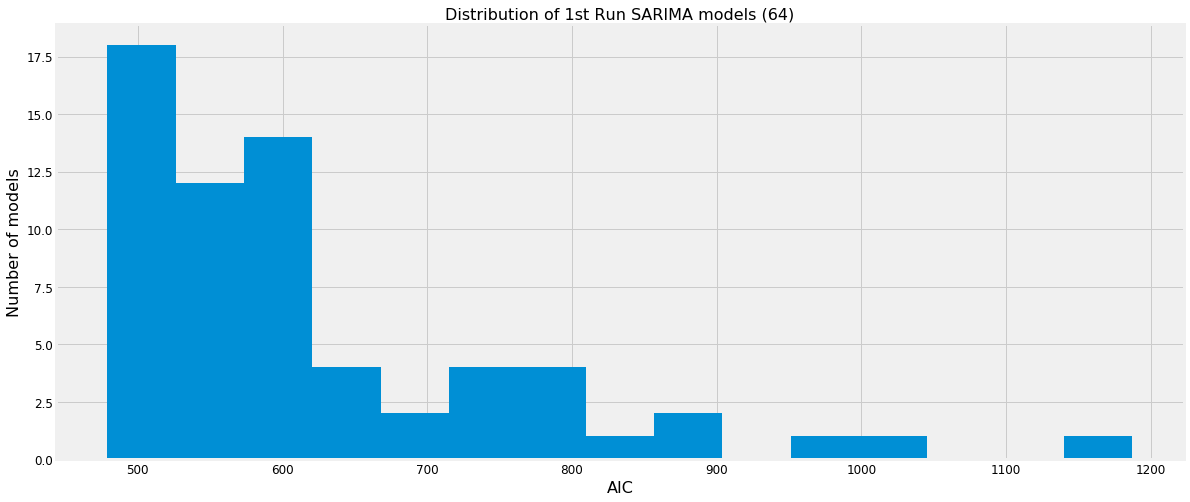

In [72]:
plt.hist(aic, bins=15)
plt.title("Distribution of 1st Run SARIMA models (64)", fontsize=16)
plt.ylabel("Number of models", fontsize=16)
plt.xlabel("AIC", fontsize=16)

## Fit the best model - first round (pre-presentations)

In [31]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0,0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2399      0.085      2.824      0.005       0.073       0.406
ar.S.L12      -0.2386      0.117     -2.035      0.042      -0.468      -0.009
ma.S.L12      -0.7920      0.124     -6.412      0.000      -1.034      -0.550
sigma2         2.8926      0.324      8.932      0.000       2.258       3.527


### RUN DIAGNOSTICS TO CHECK RESIDUALS

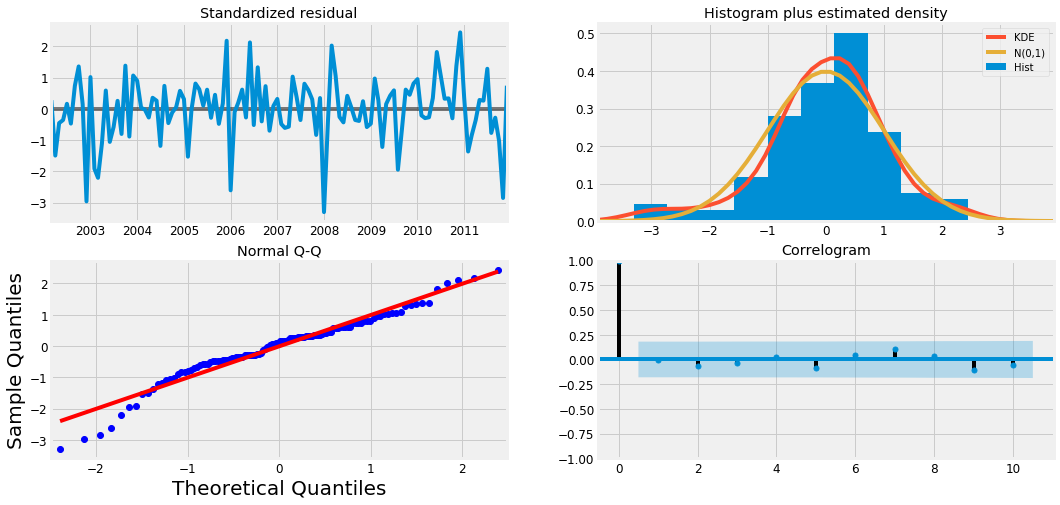

In [32]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                 AverageTemperature   No. Observations:                  144
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -235.499
Date:                            Tue, 19 Nov 2019   AIC                            478.998
Time:                                    18:06:05   BIC                            490.081
Sample:                                01-01-2000   HQIC                           483.498
                                     - 12-01-2011                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2399      0.085      2.824      0.005       0.073       0.406
ar.S.L12      -0.2386      0.117     -2.035      0.042      -0.468      -0.009
ma.S.L12      -0.7920      0.124     -6.412      0.000      -1.034      -0.550
sigma2         2.8926      0.324      8.932      0.000       2.258       3.527
===================================================================================
Ljung-Box (Q):                       21.35   Jarque-Bera (JB):                16.54
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.61
Prob(H) (two-sided):                  1.00   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## PREDICT NEXT 12 MONTHS AND PLOT

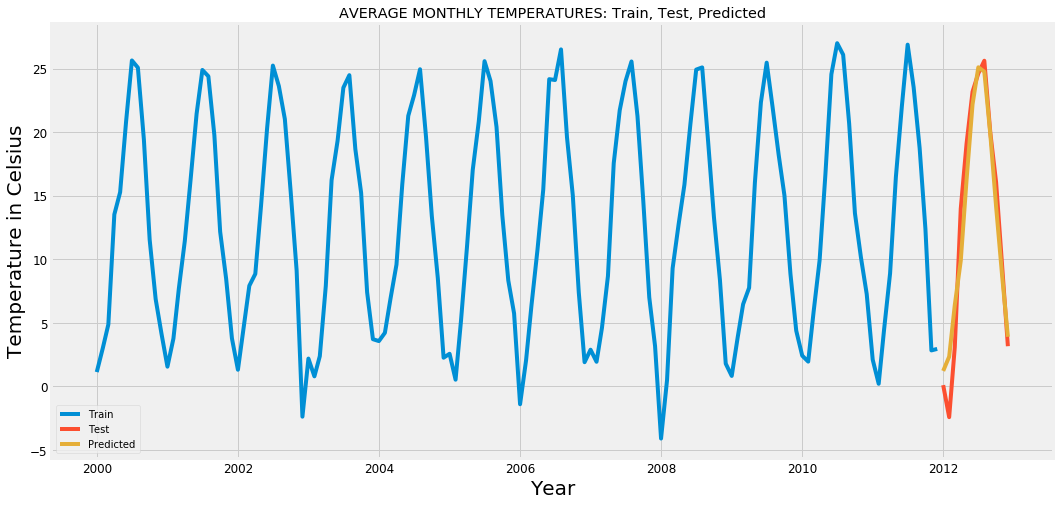

In [34]:
predictedT = results.predict(start="2012-01-01", end="2012-12-01", exog=None, dynamic=False) #dynamic=True)
plt.figure(figsize=(16,8))
plt.title("AVERAGE MONTHLY TEMPERATURES: Train, Test, Predicted", fontsize=20)
plt.ylabel("Temperature in Celsius")
plt.xlabel("Year")
plt.plot( train['AverageTemperature'], label='Train')
plt.plot(test['AverageTemperature'], label='Test')
plt.plot(predictedT, label='Predicted')
plt.legend(loc='best')
plt.show()

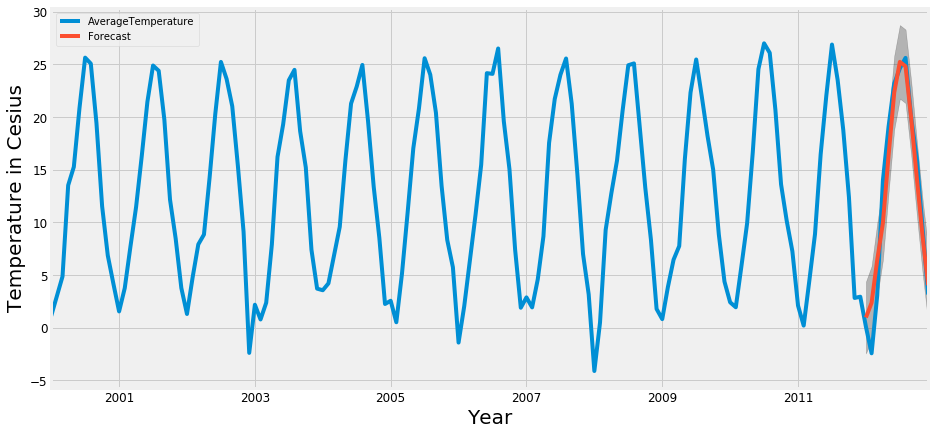

In [62]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = df5.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Temperature in Cesius')
plt.legend()
plt.show()

## CALCULATE ERROR

In [35]:
mse = ((predictedT - test['AverageTemperature']) ** 2).mean()
mse
print('The MSE of our forecasts is {}'.format(round(mse, 2)))

The MSE of our forecasts is 5.53


In [36]:
print('The RMSE of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The RMSE of our forecasts is 2.35


## PREDICT FURTHER OUT - PLOT WITH CONFIDENCE INTERVAL

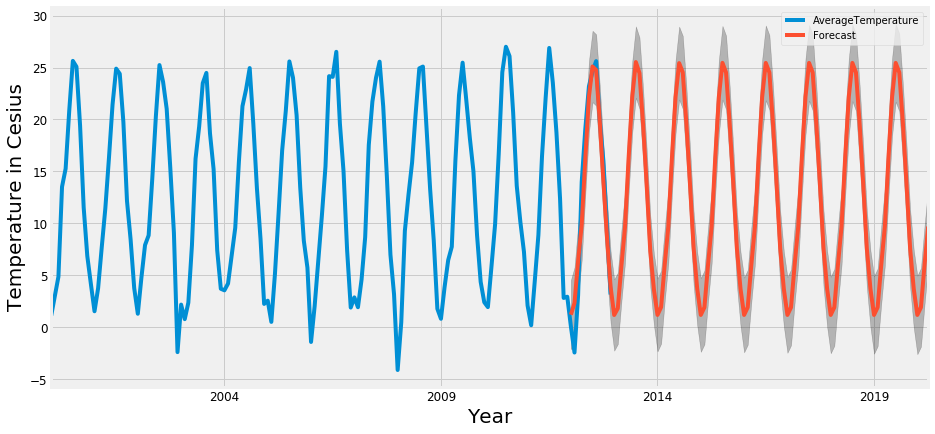

In [37]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = df5.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Temperature in Cesius')
plt.legend()
plt.show()

# FIT NEW BEST MODEL - after presentations

In [24]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(4,1, 0),
                                seasonal_order=(4, 4, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\mstet\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mstet\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4549      0.313     -1.451      0.147      -1.069       0.159
ar.L2         -0.4369      0.303     -1.442      0.149      -1.031       0.157
ar.L3         -0.3484      0.235     -1.482      0.138      -0.809       0.112
ar.L4         -0.1871      0.210     -0.889      0.374      -0.600       0.225
ar.S.L12      -2.0126      0.165    -12.200      0.000      -2.336      -1.689
ar.S.L24      -2.0144      0.310     -6.503      0.000      -2.622      -1.407
ar.S.L36      -1.1974      0.316     -3.795      0.000      -1.816      -0.579
ar.S.L48      -0.3774      0.160     -2.356      0.018      -0.691      -0.063
ma.S.L12       0.9935     29.822      0.033      0.973     -57.456      59.443
sigma2         0.7488     21.989      0.034      0.973     -42.349      43.847


## RUN DIAGNOSTIS AND CHECK RESIDUALS

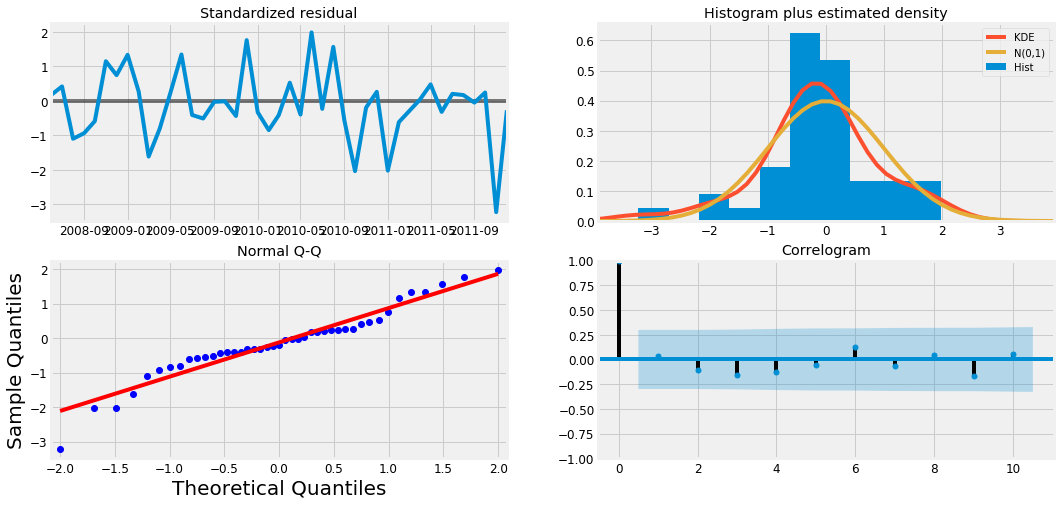

In [30]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                 AverageTemperature   No. Observations:                  144
Model:             SARIMAX(4, 1, 0)x(4, 4, 1, 12)   Log Likelihood                -115.521
Date:                            Sat, 30 Nov 2019   AIC                            251.041
Time:                                    15:03:56   BIC                            268.653
Sample:                                01-01-2000   HQIC                           257.536
                                     - 12-01-2011                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4549      0.313     -1.451      0.147      -1.069       0.159
ar.L2         -0.4369      0.303     -1.442      0.149      -1.031       0.157
ar.L3         -0.3484      0.235     -1.482      0.138      -0.809       0.112
ar.L4         -0.1871      0.210     -0.889      0.374      -0.600       0.225
ar.S.L12      -2.0126      0.165    -12.200      0.000      -2.336      -1.689
ar.S.L24      -2.0144      0.310     -6.503      0.000      -2.622      -1.407
ar.S.L36      -1.1974      0.316     -3.795      0.000      -1.816      -0.579
ar.S.L48      -0.3774      0.160     -2.356      0.018      -0.691      -0.063
ma.S.L12       0.9935     29.822      0.033      0.973     -57.456      59.443
sigma2         0.7488     21.989      0.034      0.973     -42.349      43.847
===================================================================================
Ljung-Box (Q):                       32.70   Jarque-Bera (JB):                 4.28
Prob(Q):                              0.79   Prob(JB):                         0.12
Heteroskedasticity (H):               1.34   Skew:                            -0.44
Prob(H) (two-sided):                  0.59   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## PREDICT NEXT 12 MONTHS

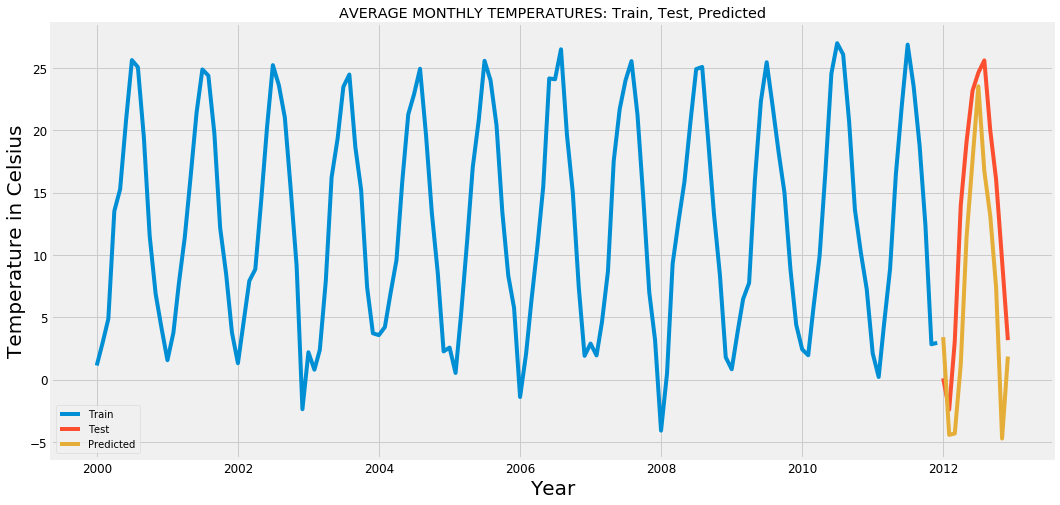

In [28]:
predictedT2 = results.predict(start="2012-01-01", end="2012-12-01", exog=None, dynamic=False) #dynamic=True)
plt.figure(figsize=(16,8))
plt.title("AVERAGE MONTHLY TEMPERATURES: Train, Test, Predicted")
plt.ylabel("Temperature in Celsius")
plt.xlabel("Year")
plt.plot( train['AverageTemperature'], label='Train')
plt.plot(test['AverageTemperature'], label='Test')
plt.plot(predictedT2, label='Predicted')
plt.legend(loc='best')
plt.show()

## CALCULATE ERROR

In [29]:
mse = ((predictedT2 - test['AverageTemperature']) ** 2).mean()
print('The MSE of our forecasts is {}'.format(round(mse, 2)))

print('The RMSE of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The MSE of our forecasts is 60.86
The RMSE of our forecasts is 7.8
